In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sb_plt

import torch
from sklearn.model_selection import train_test_split

from scipy.stats import kurtosis as scipy_kurtosis
from scipy.stats import skew as scipy_skew
from scipy.optimize import curve_fit

import datetime
import pathlib

print("torch version: ", torch.__version__)
plt.style.use("ggplot")

torch version:  2.4.1+cu121


In [9]:
GPU_DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
GPU_DEVICE

device(type='cuda', index=0)

In [10]:
LOGGING = {}
LOGS_PATH = "linear_models_analysis_plots/"

# Load Data

In [11]:
pred_lengths = [24, 36, 48, 60]
models = ["Linear", "DLinear", "NLinear"]

input_data = {}
ground_truth_data = {}
predictions_data = {}

for model in models:
    # Initialise datasets for each model
    input_data[model], ground_truth_data[model], predictions_data[model] = {}, {}, {}
    for pred_len in pred_lengths:
        datafolder = f"./results/{model}_{pred_len}/"
        
        input_data[model][pred_len] = np.load(datafolder + "test_input.npy")
        ground_truth_data[model][pred_len] = np.load(datafolder + "test_ground_truth.npy")
        predictions_data[model][pred_len] = np.load(datafolder + "test_predictions.npy")

### Plot Input Data With Custom Colors

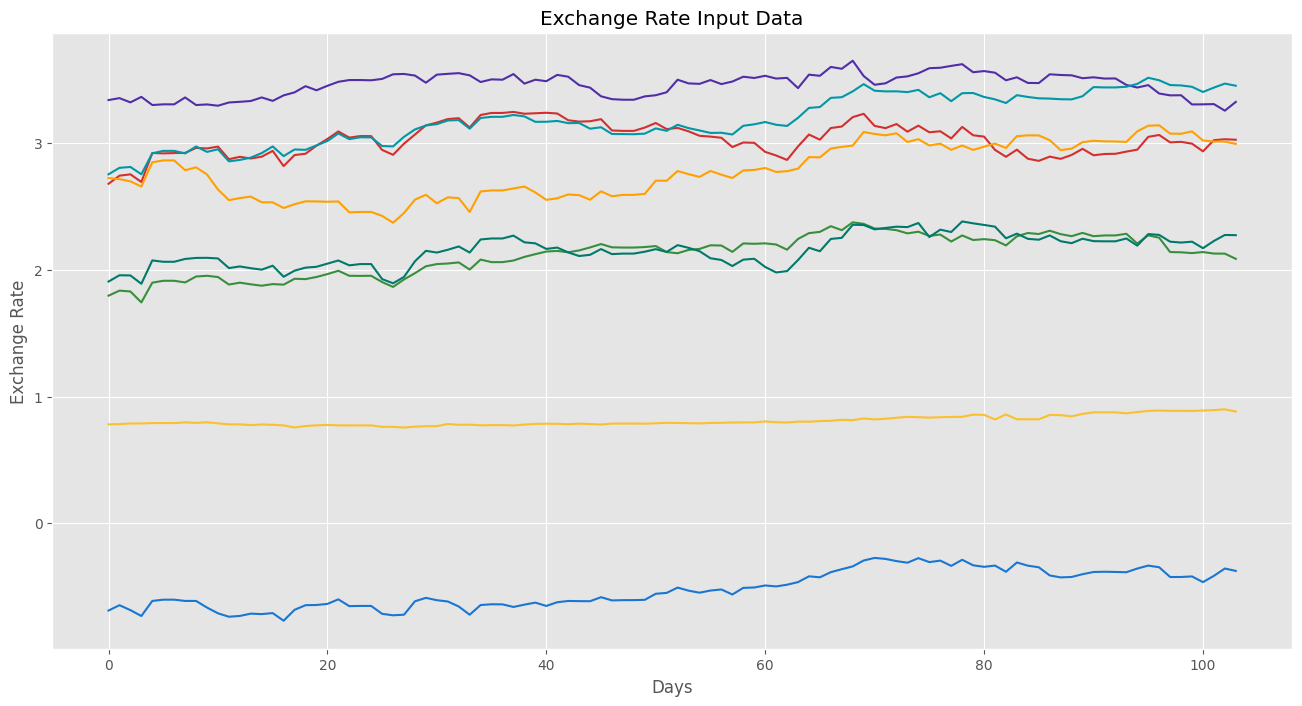

In [12]:
multi_colors = ['#D32F2F', '#1976D2', '#388E3C', '#FFA000', "#FBC02D", '#512DA8', "#0097A7", "#00796B"]

BATCH_INDEX = 10
fig, axs = plt.subplots(1,1, figsize=(16,8))

axs.set_prop_cycle('color', multi_colors)
axs.plot(input_data["DLinear"][24][BATCH_INDEX])

plt.xlabel("Days")
plt.ylabel("Exchange Rate")

plt.title("Exchange Rate Input Data")
plt.show()

## Linear Predictions

### 24 Days

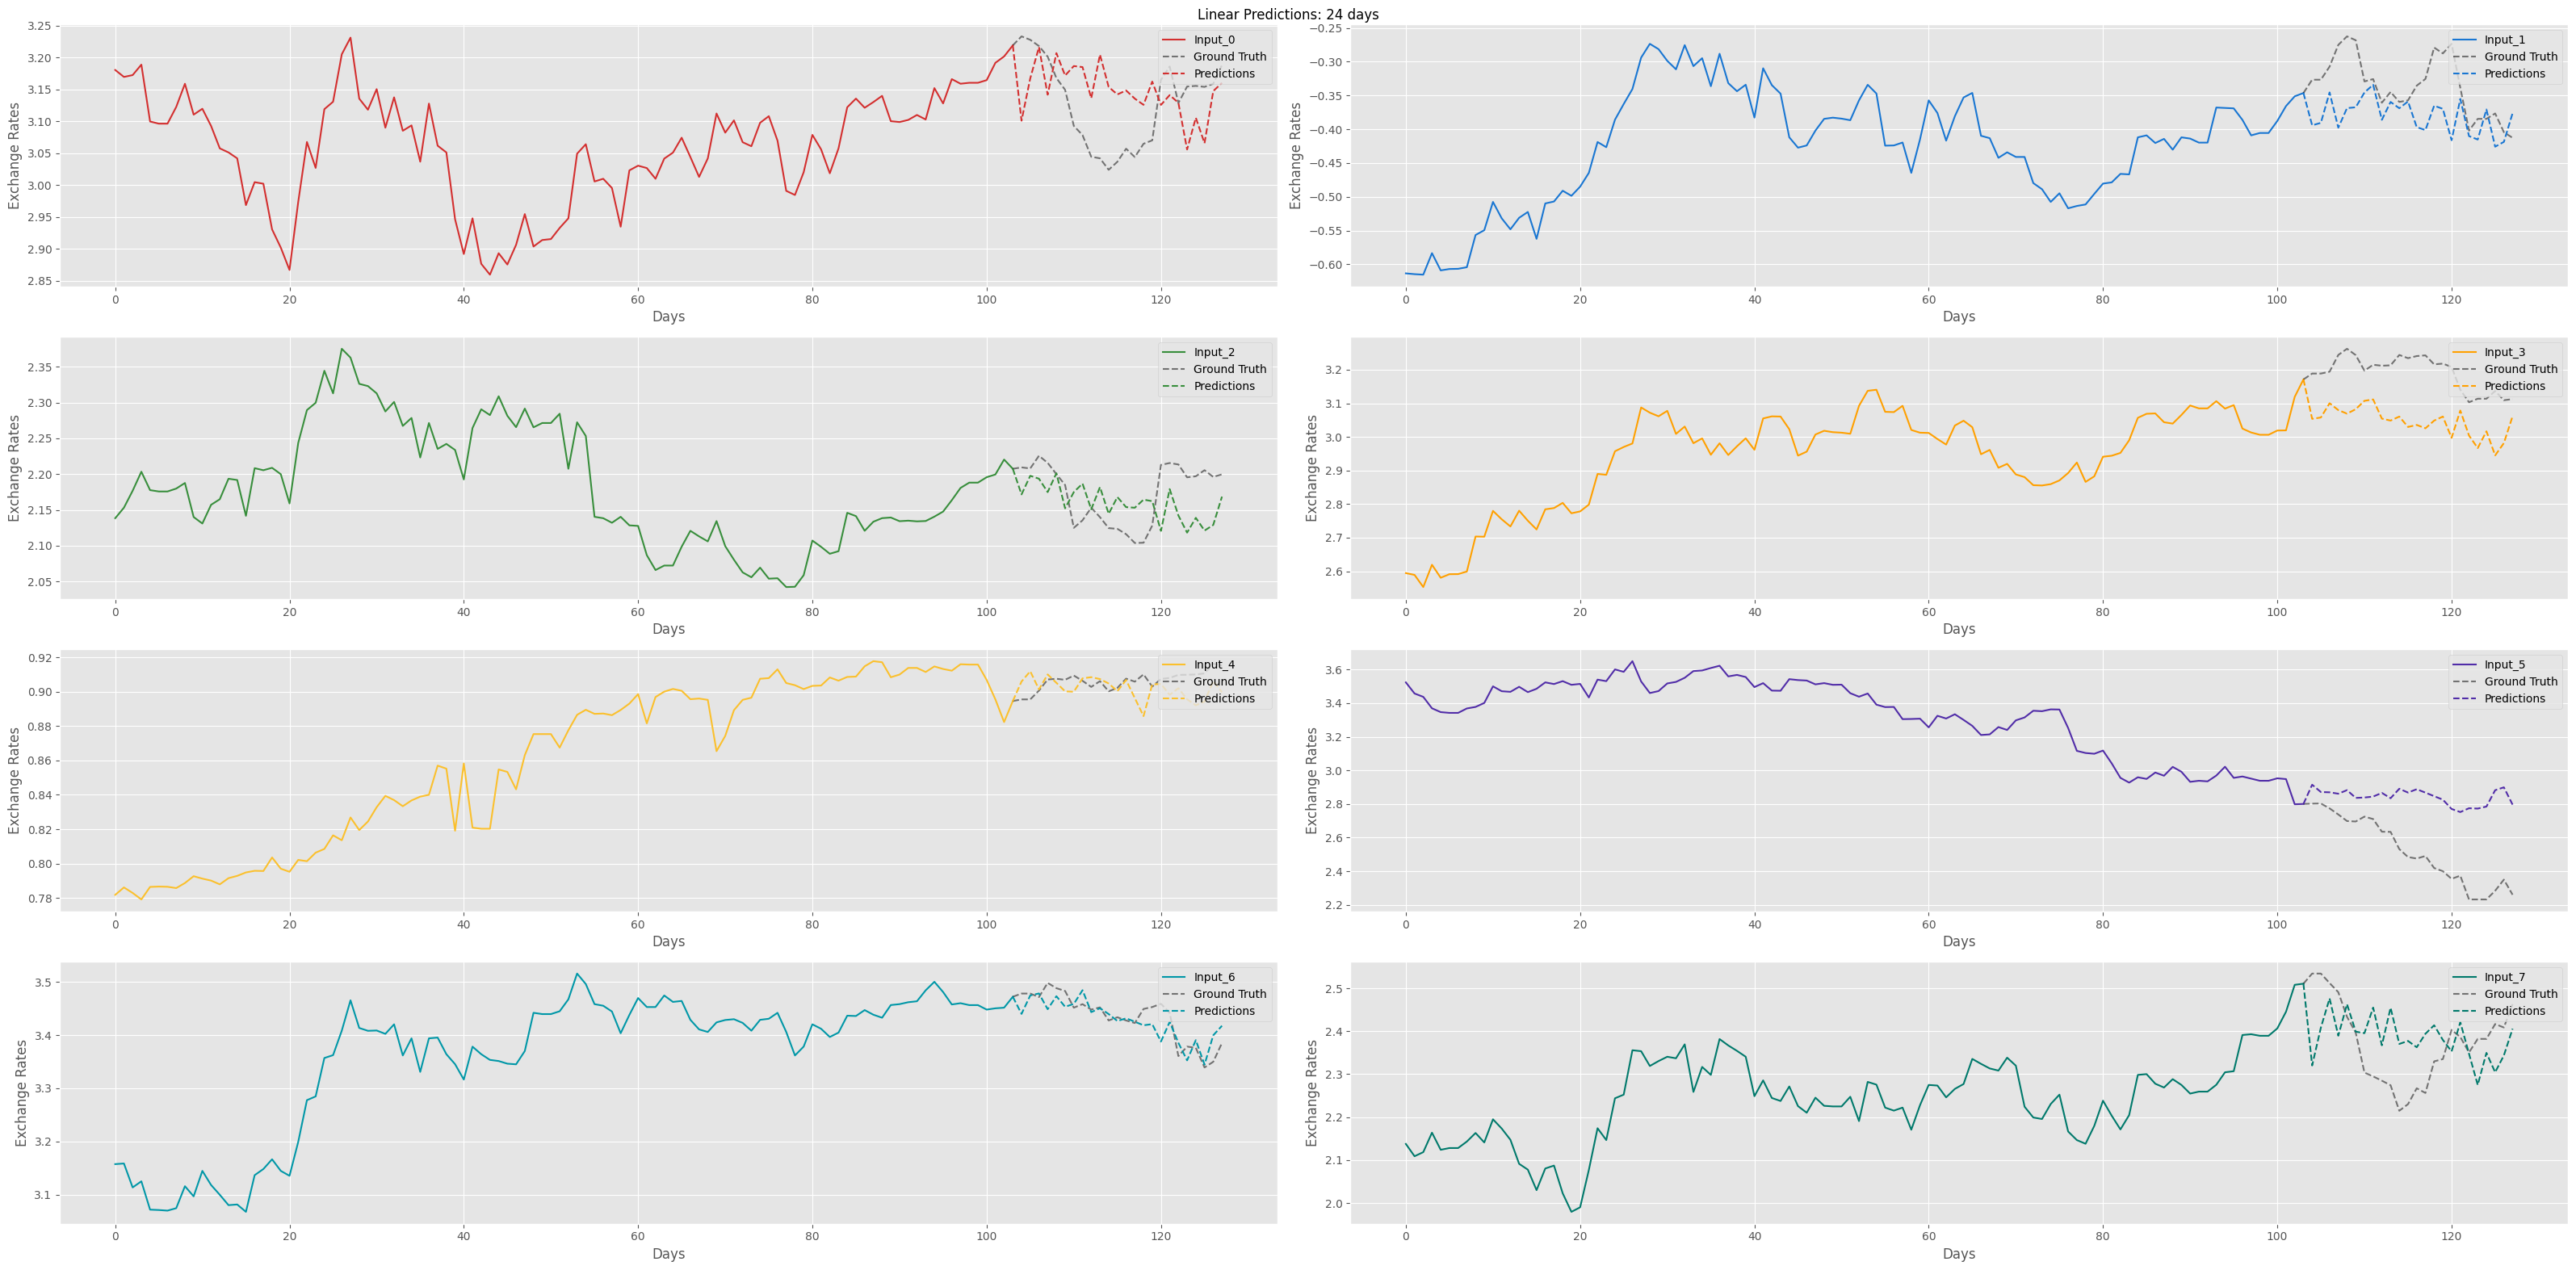

In [13]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][24])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][24])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][24])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 24 days")
plt.show()

### 36 Days

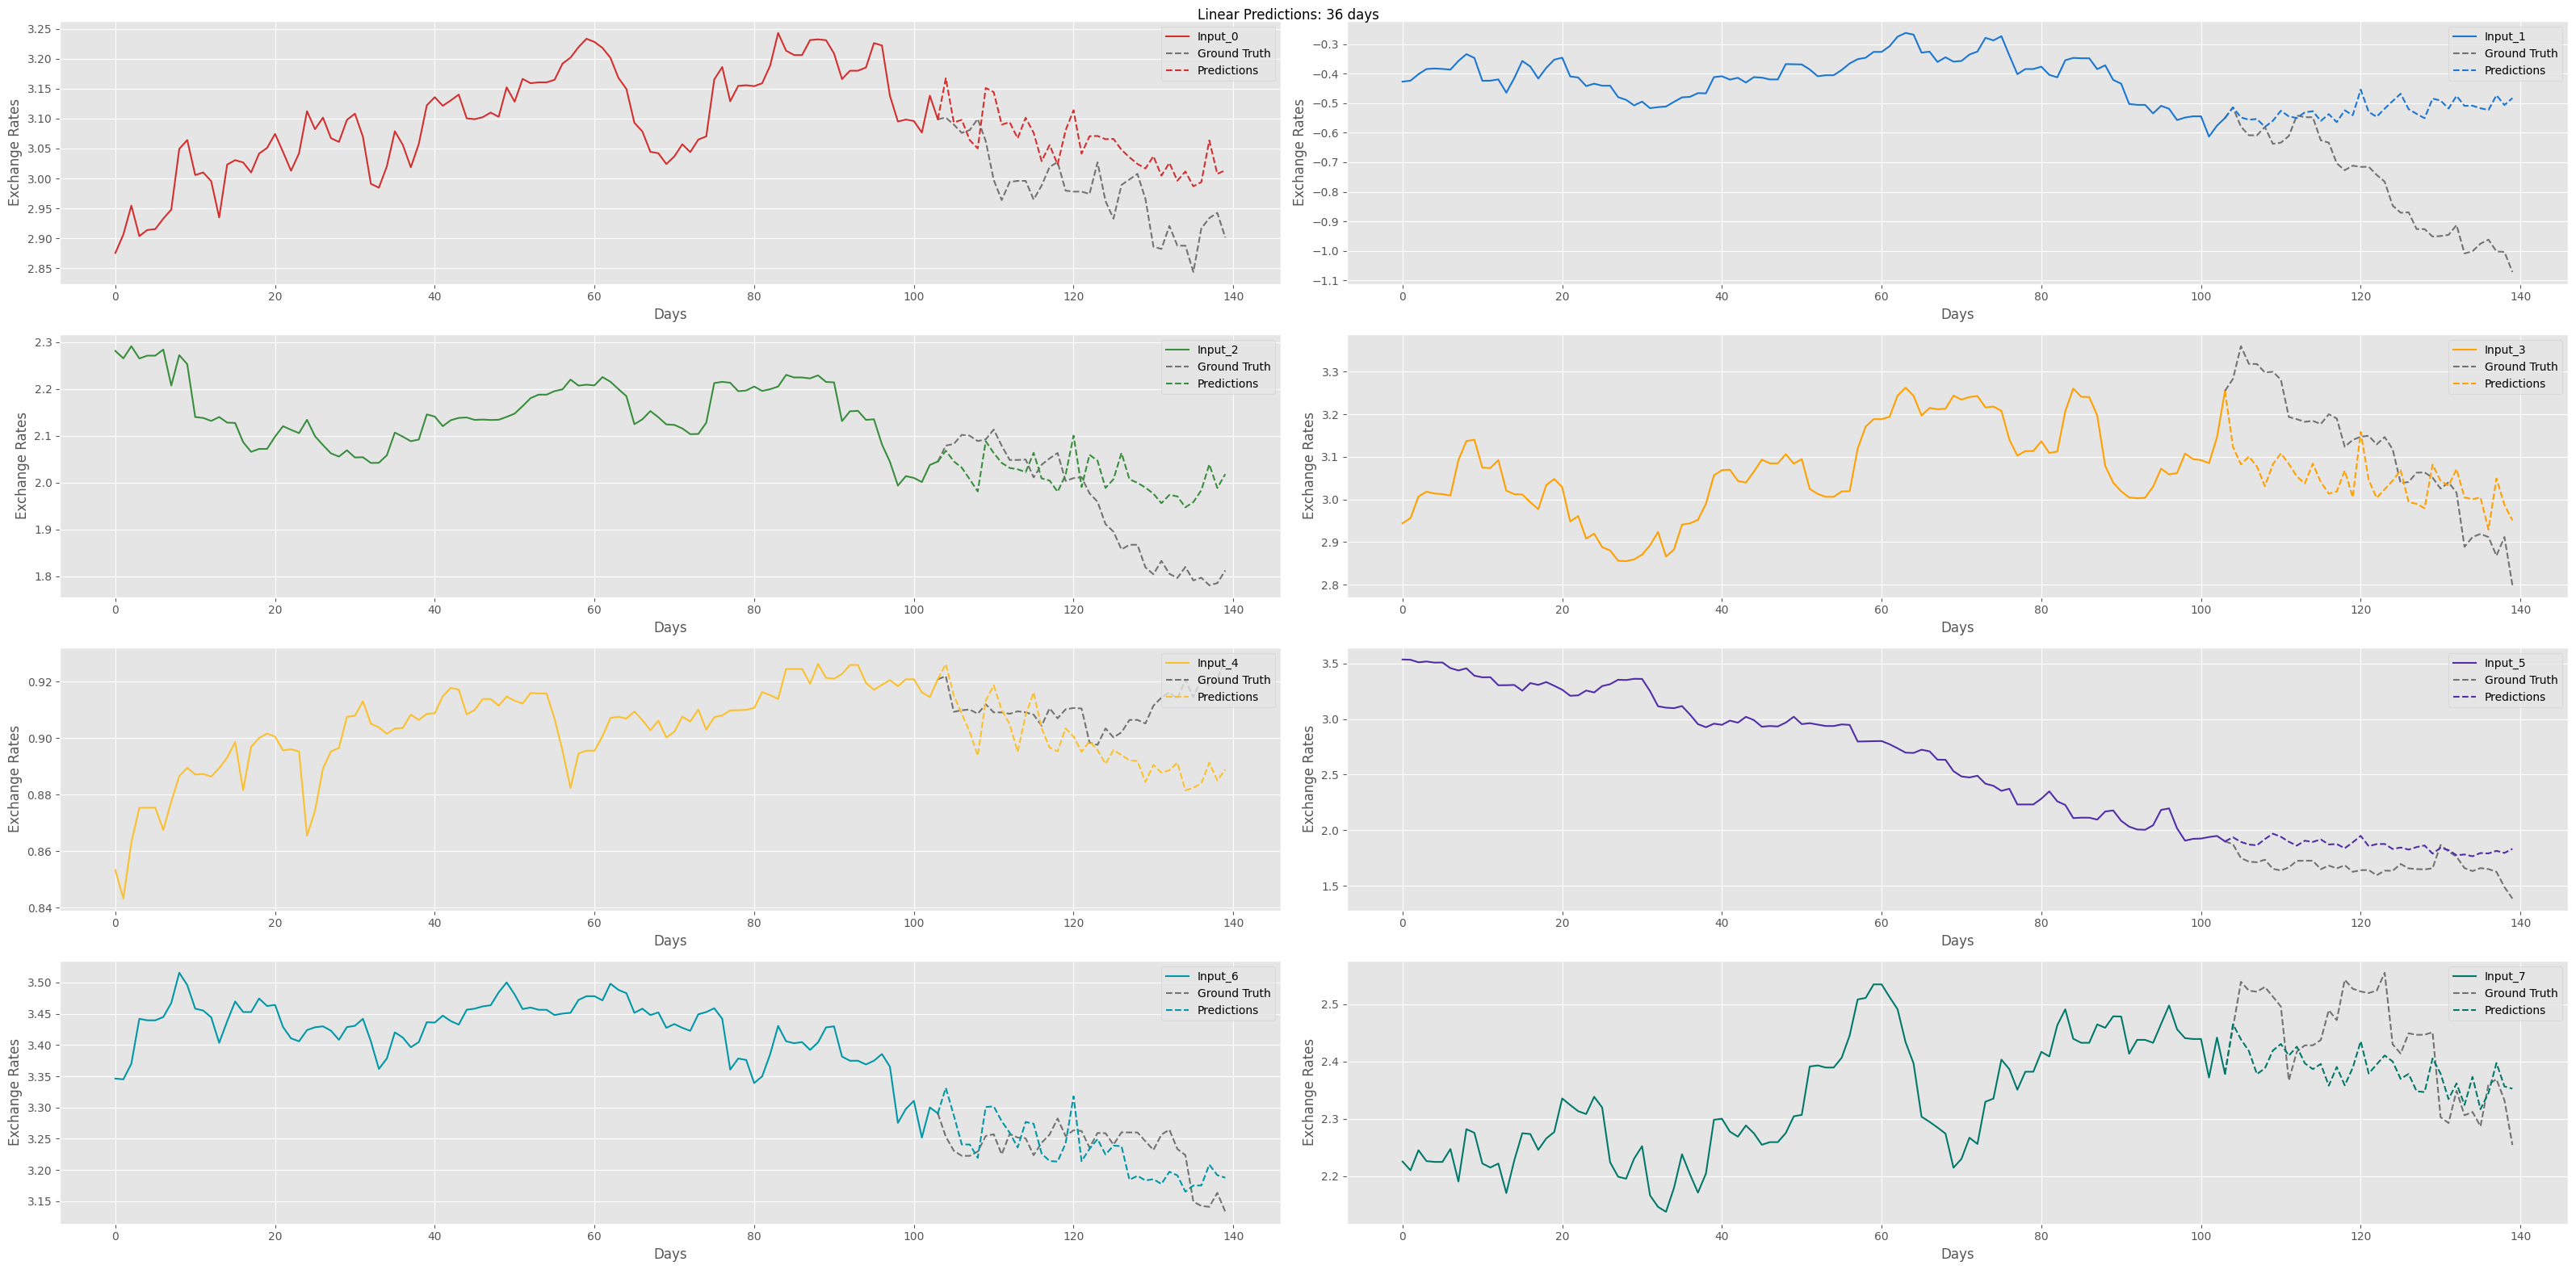

In [14]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][36])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][36])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][36])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 36 days")
plt.show()

### 48 Days

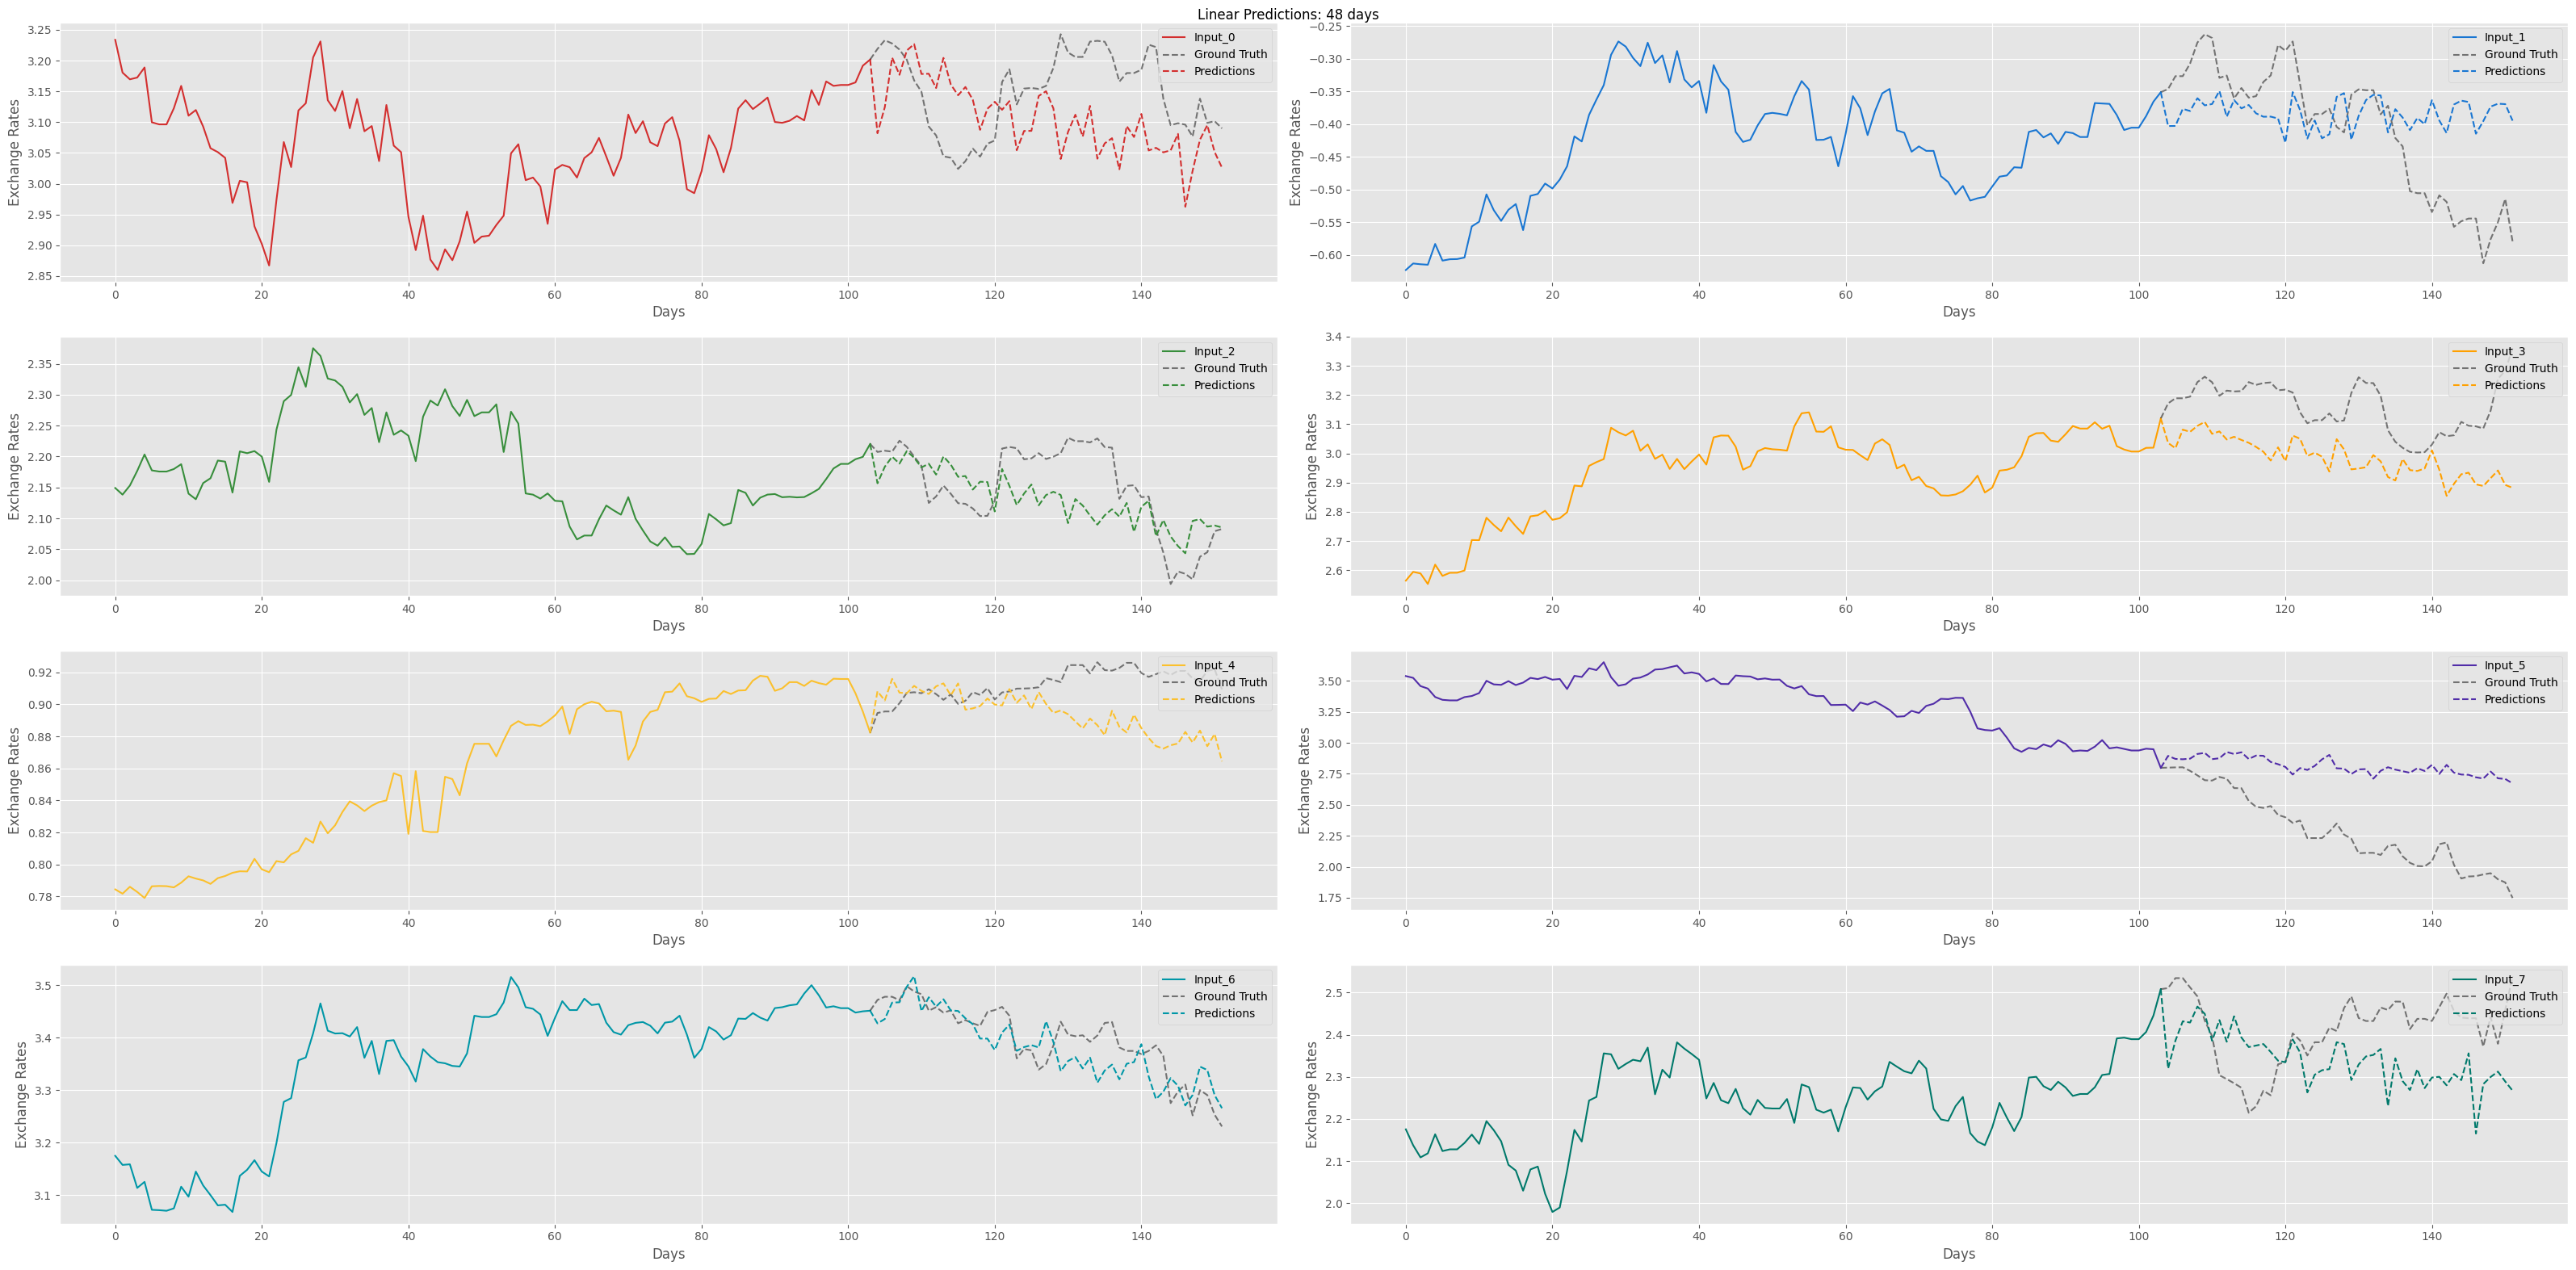

In [15]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][48])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][48])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][48])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 48 days")
plt.show()

### 60 Days

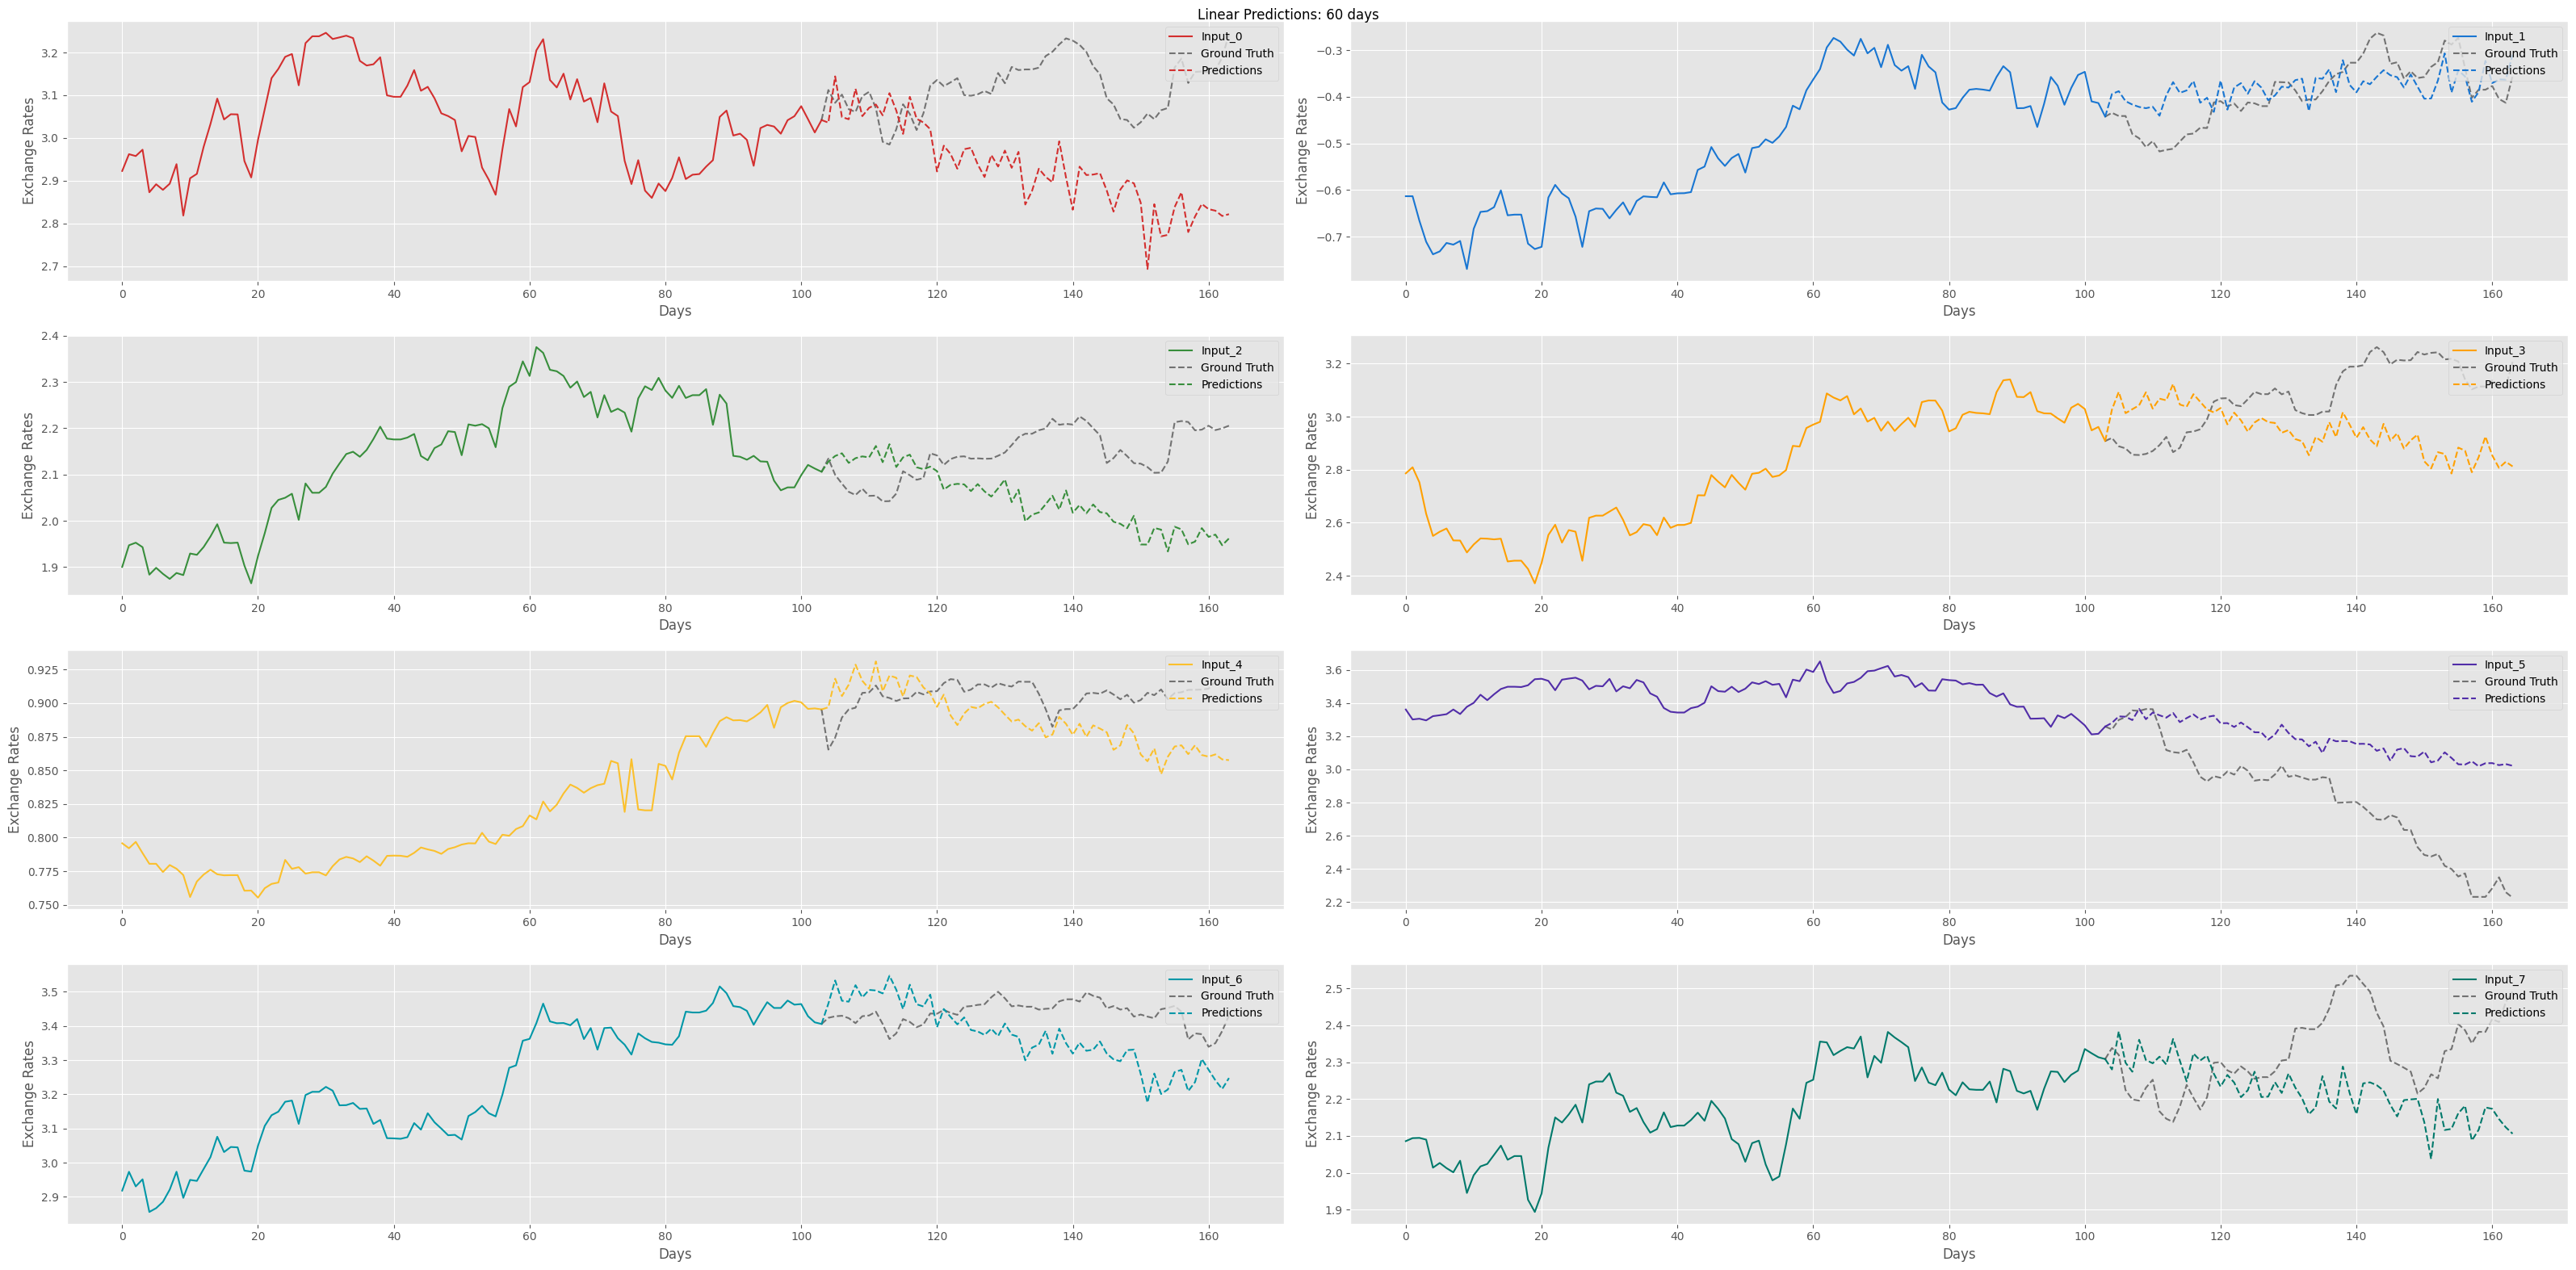

In [16]:
LINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["Linear"][60])
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["Linear"][60])
LINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["Linear"][60])

# Add last time-step point of input onto ground truth and predictions
LINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
LINEAR_PREDICTIONS_TIME_SERIES = torch.cat((LINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), LINEAR_PREDICTIONS_TIME_SERIES), dim=1)

BATCH_INDEX = torch.randint(1, 100, (1,)).item()#10

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(LINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(LINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(LINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, LINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, LINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("Linear Predictions: 60 days")
plt.show()

## DLinear Predictions

### 24 Days

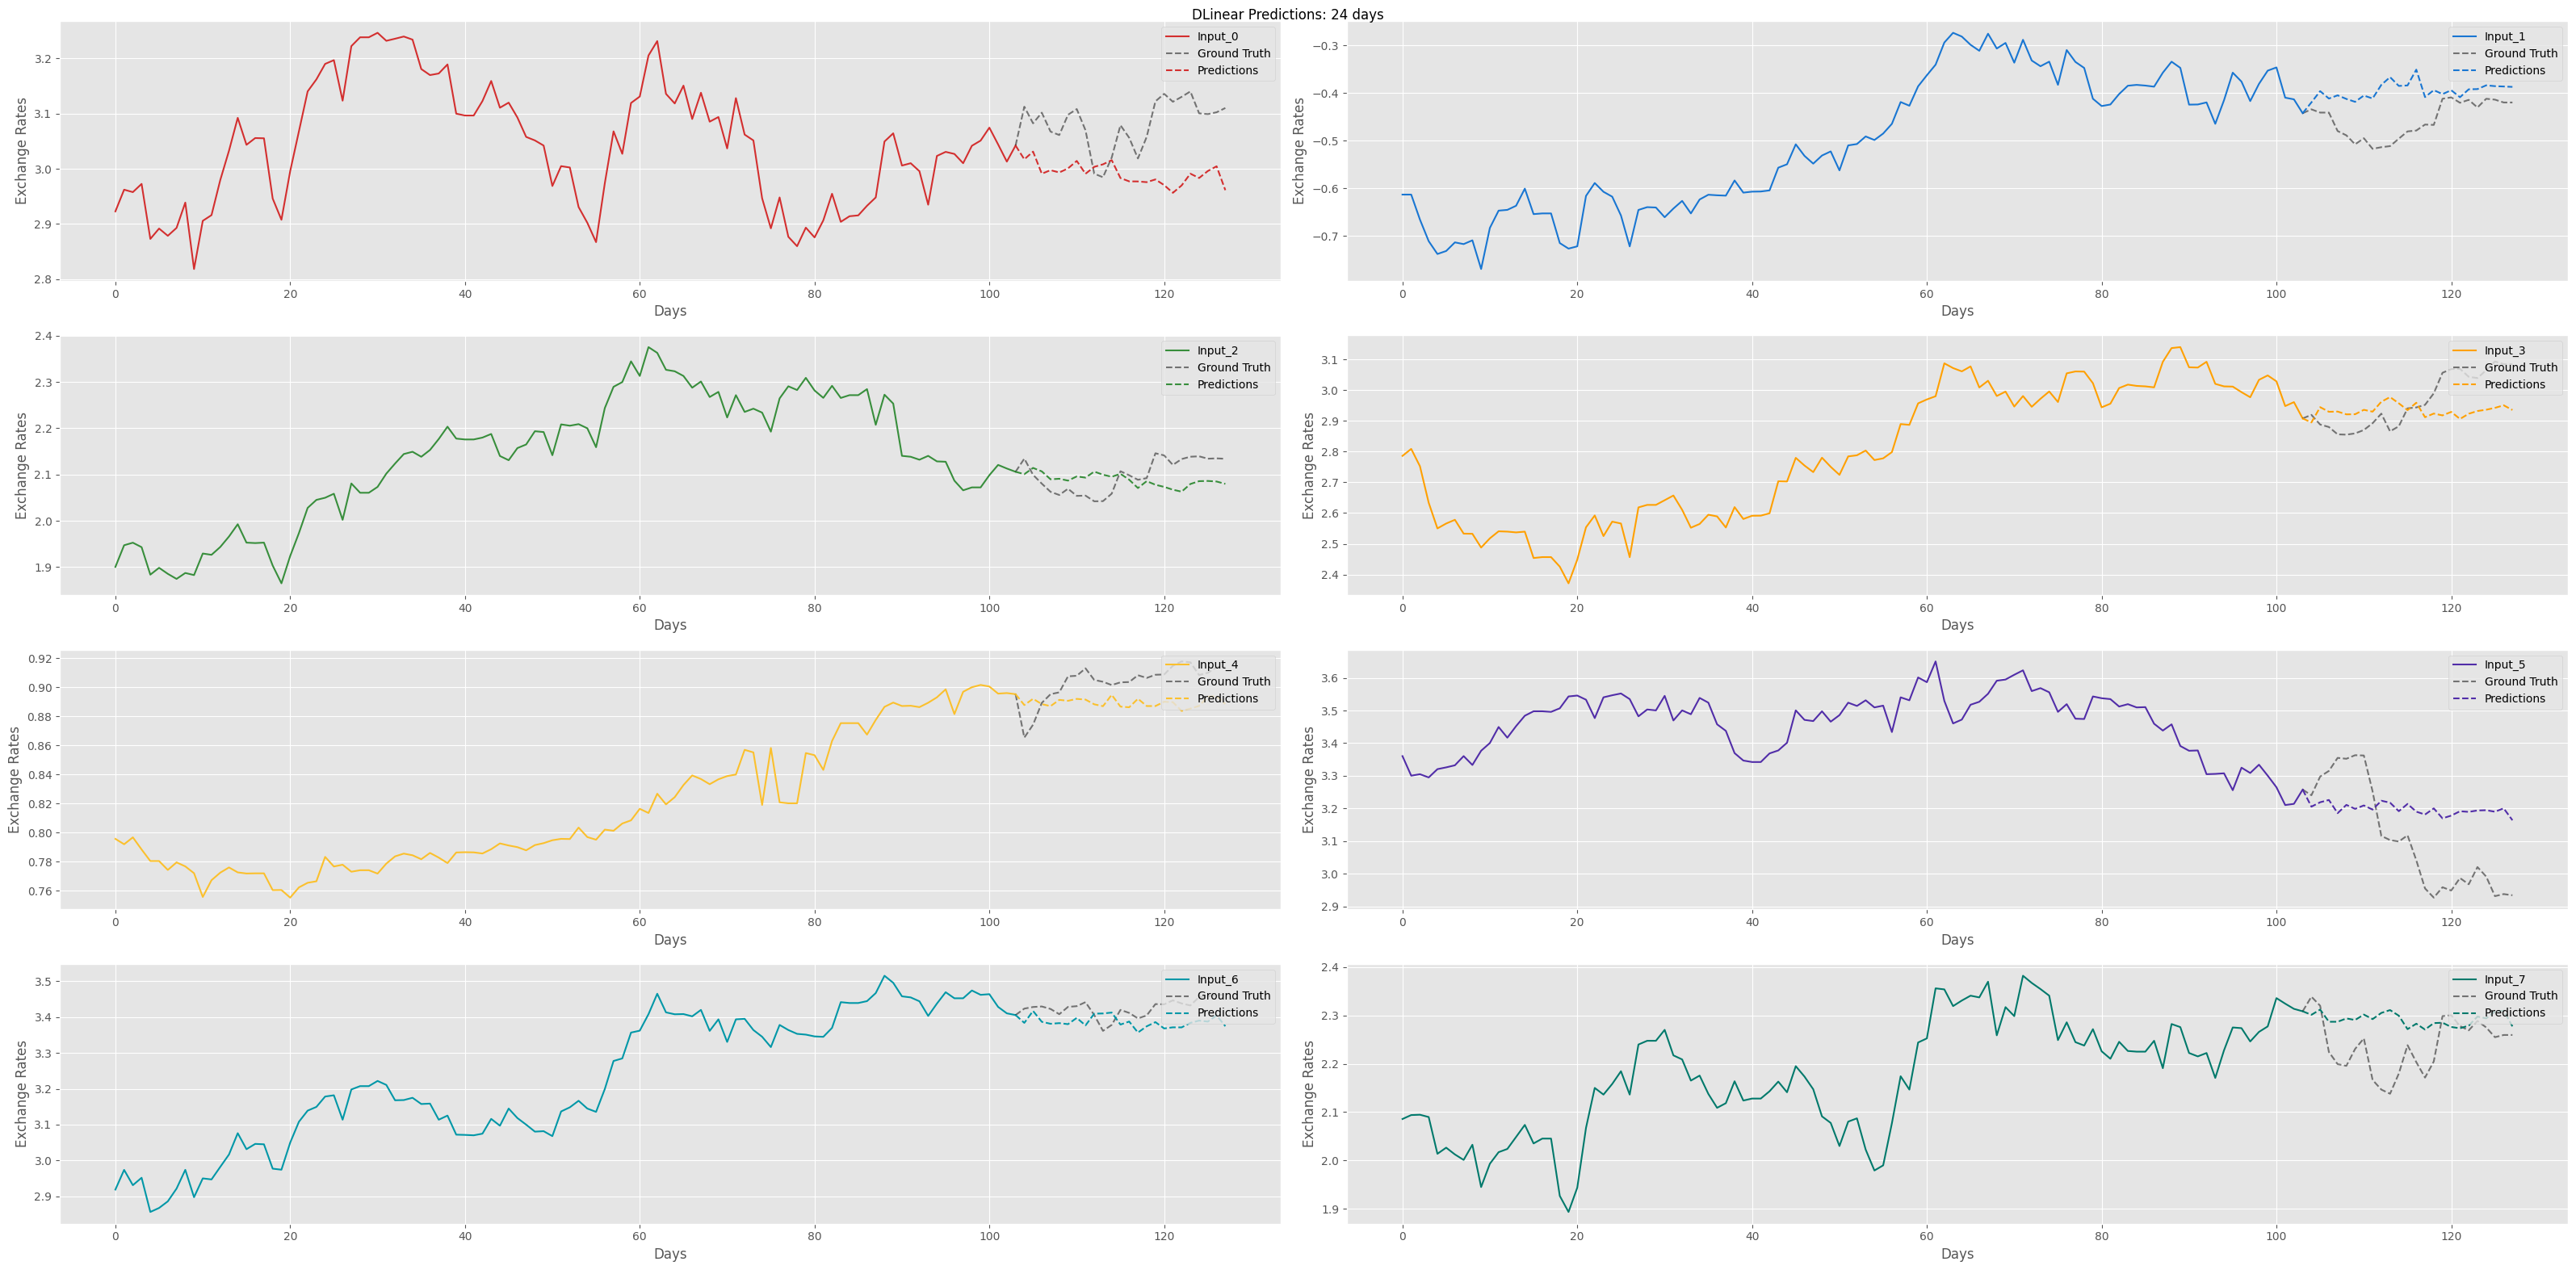

In [17]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][24])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][24])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][24])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 24 days")
plt.show()

### 36 Days

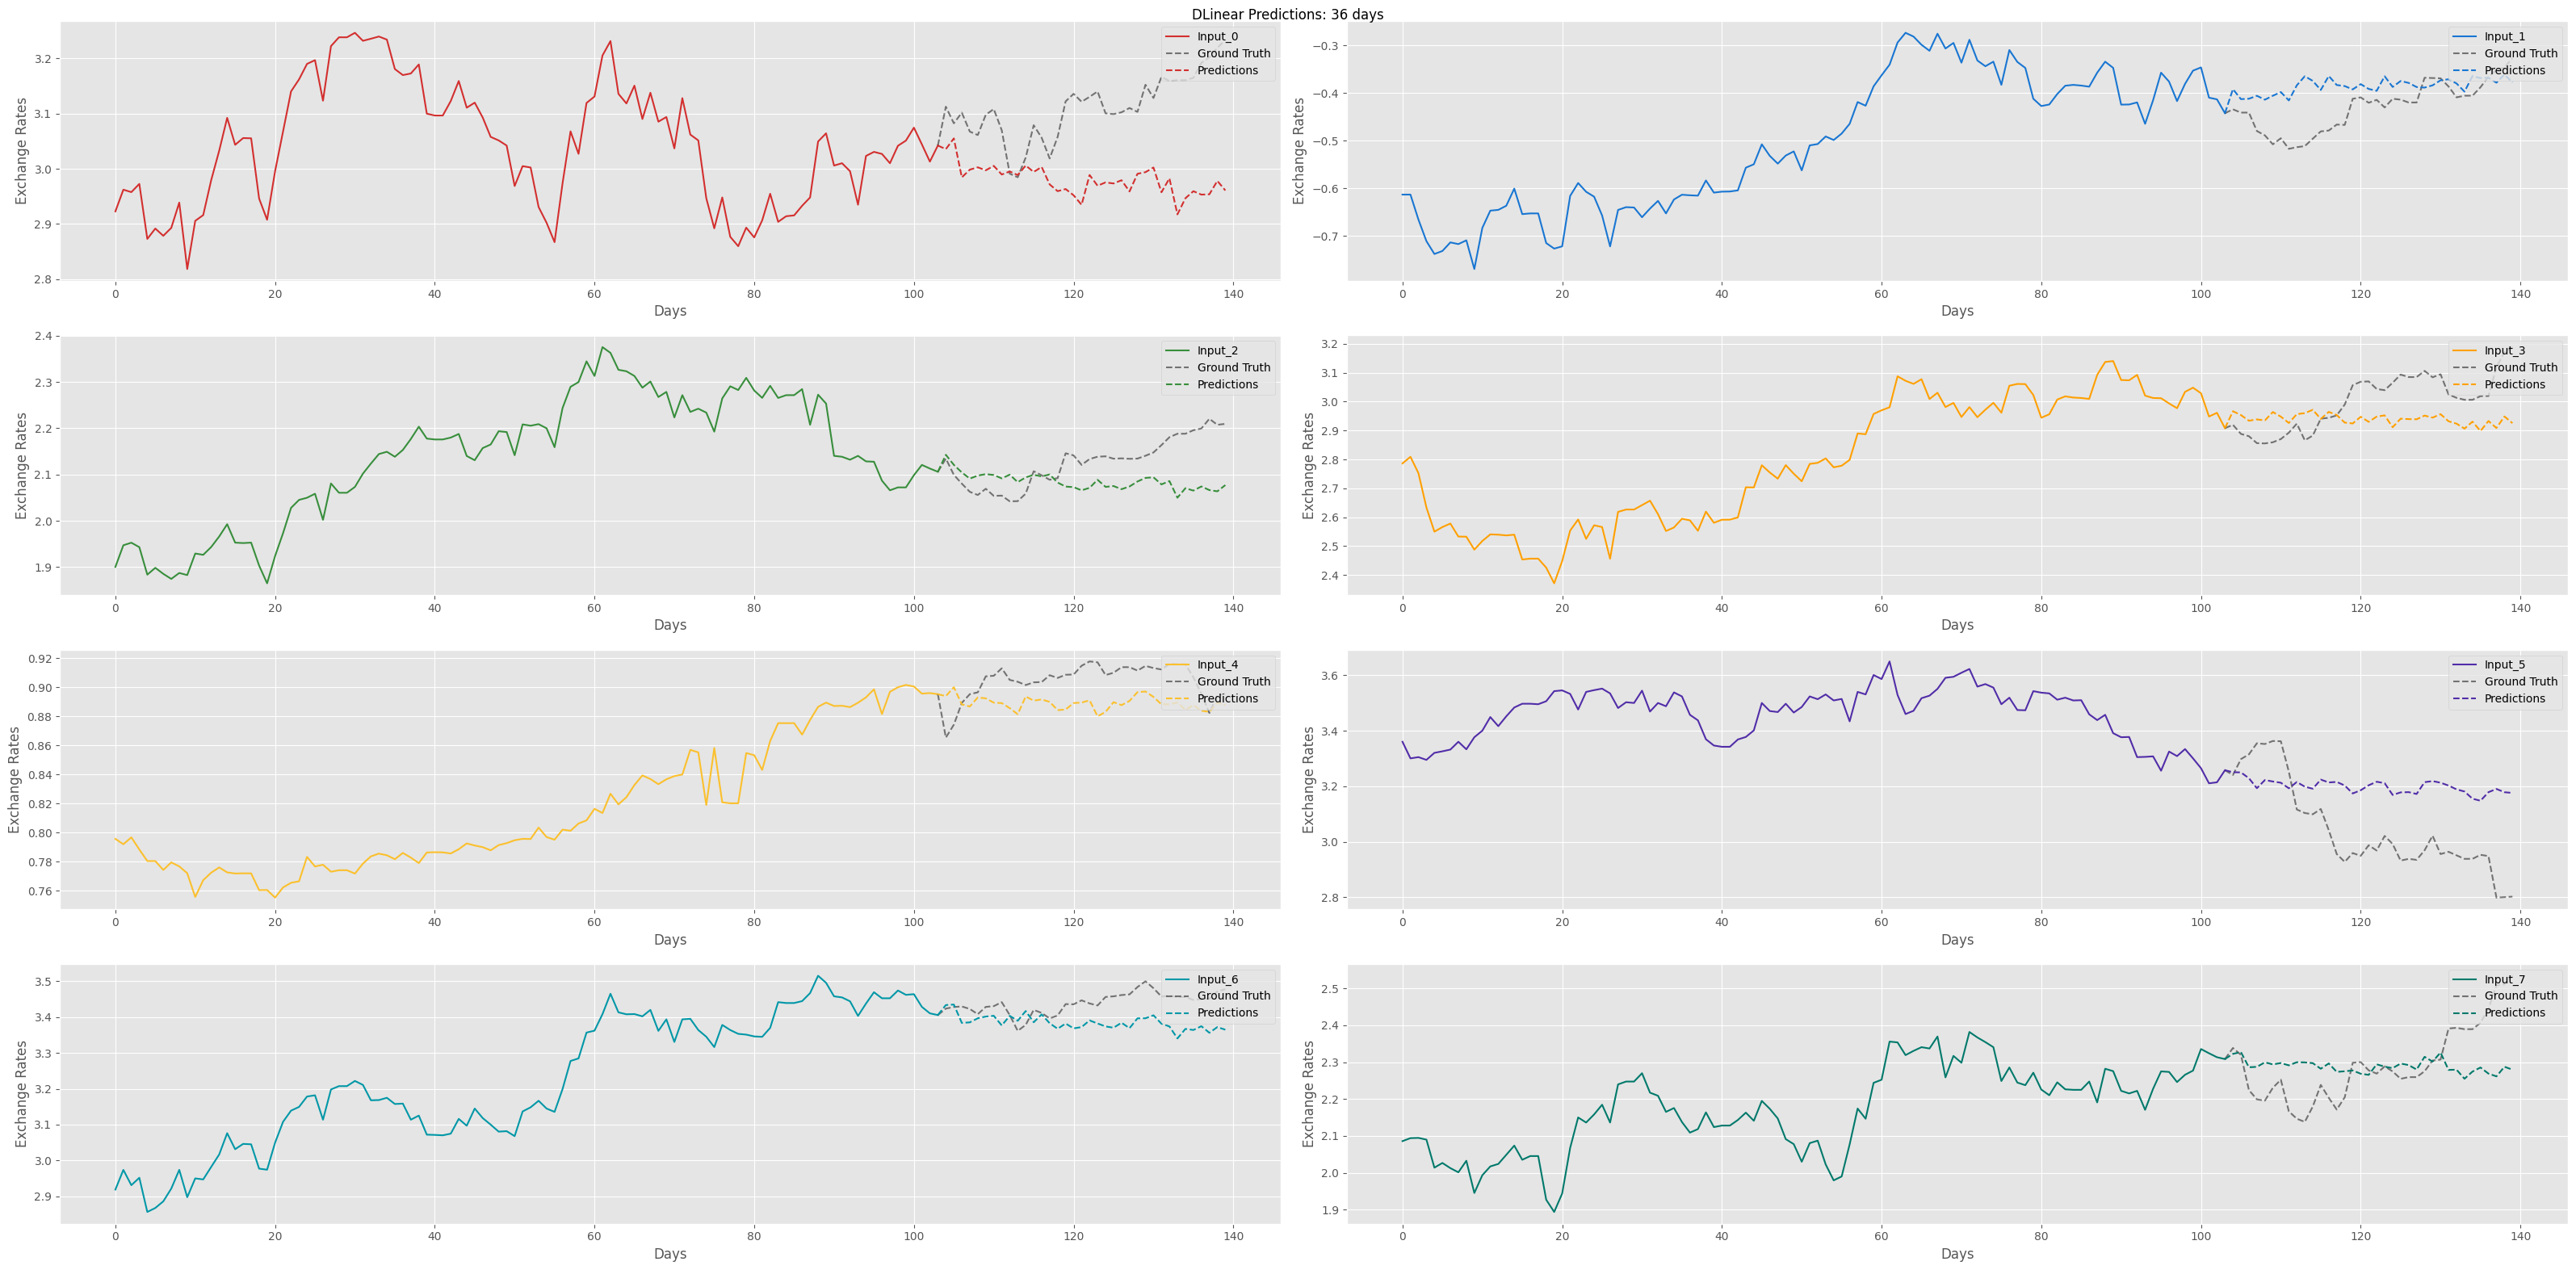

In [18]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][36])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][36])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][36])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 36 days")
plt.show()

### 48 Days

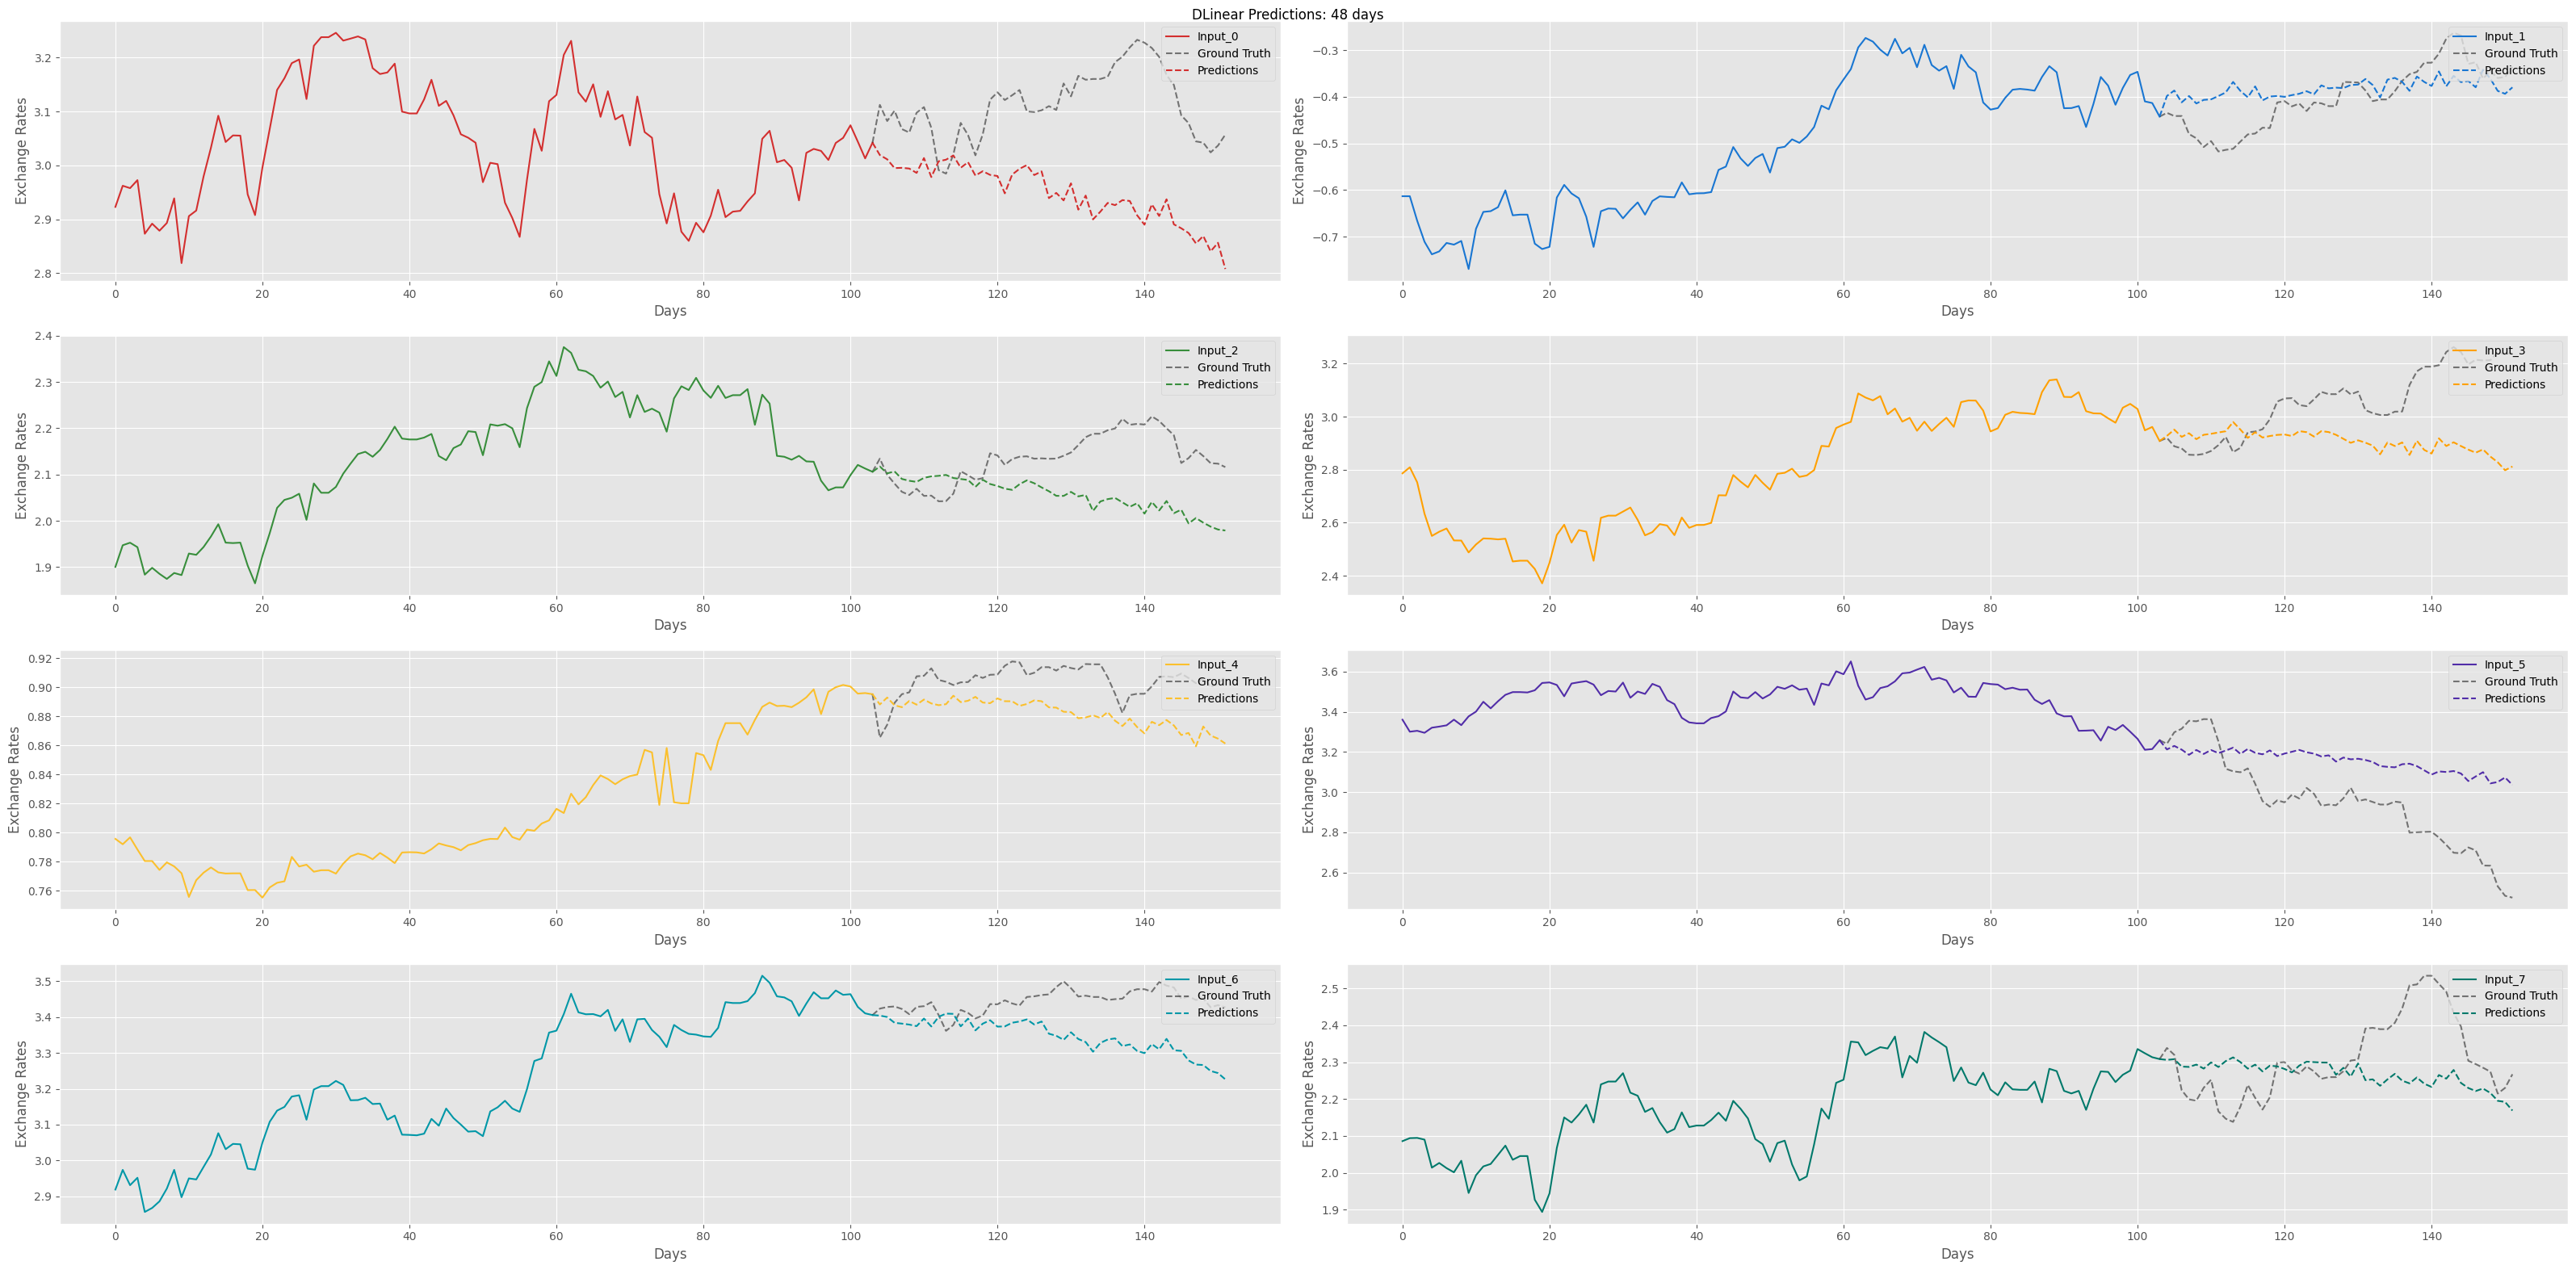

In [19]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][48])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][48])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][48])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 48 days")
plt.show()

### 60 Days

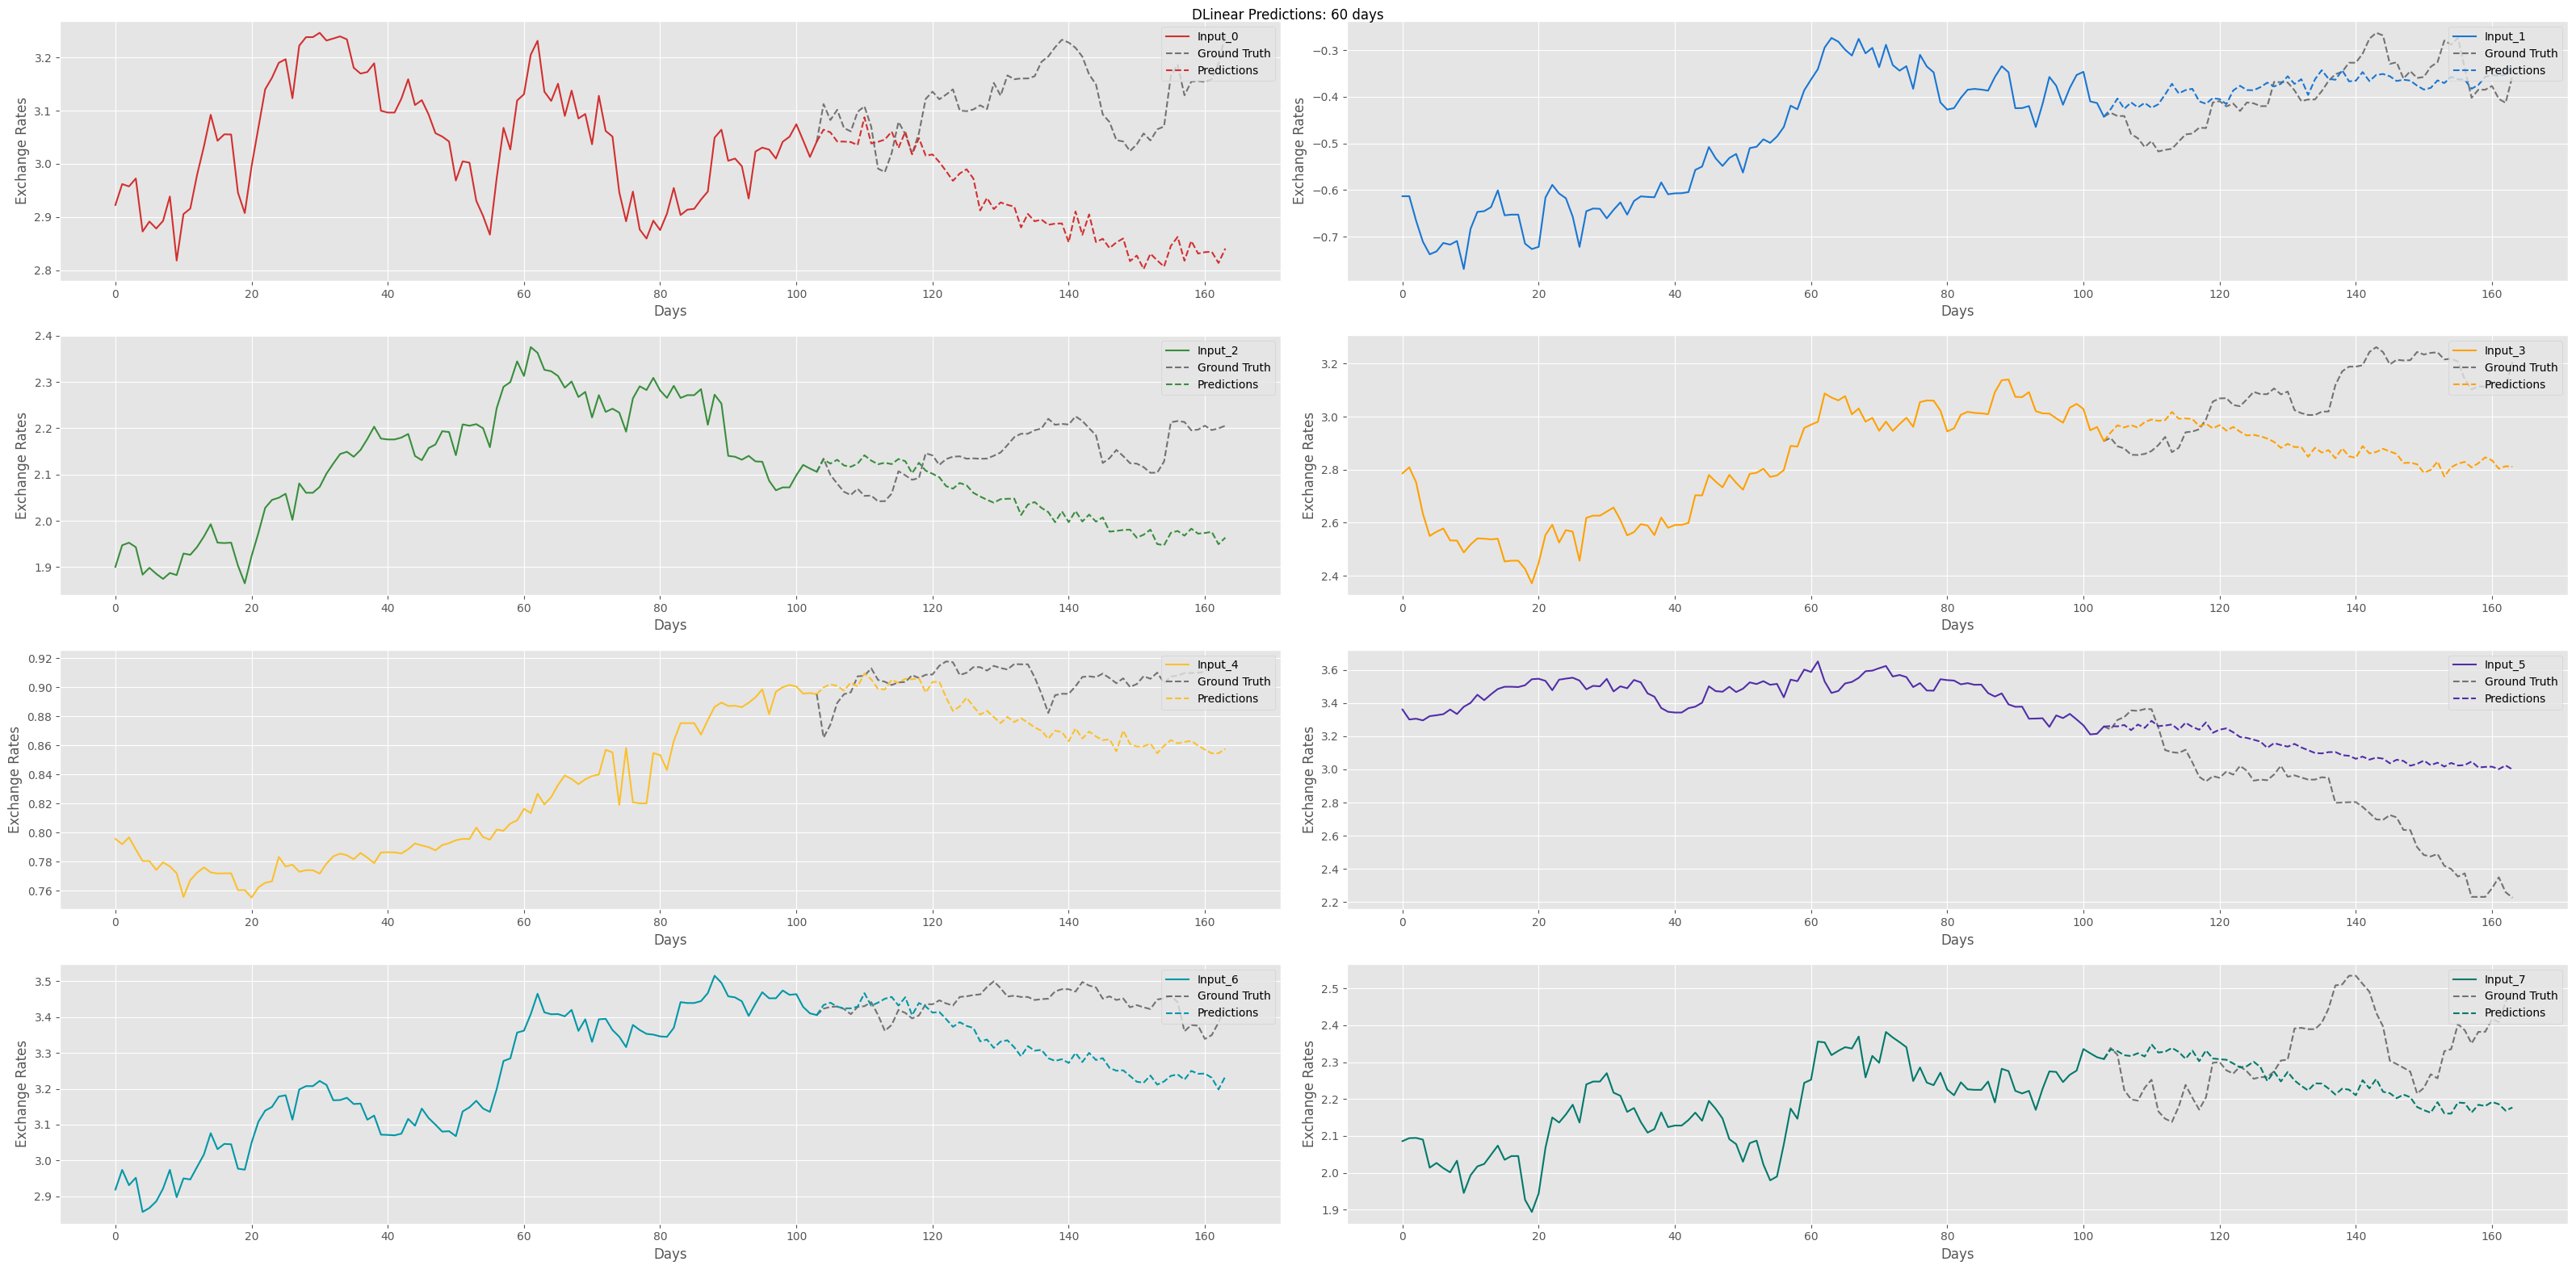

In [20]:
DLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["DLinear"][60])
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["DLinear"][60])
DLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["DLinear"][60])

# Add last time-step point of input onto ground truth and predictions
DLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
DLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((DLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), DLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(DLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(DLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(DLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, DLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, DLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("DLinear Predictions: 60 days")
plt.show()

## NLinear Predictions

### 24 Days

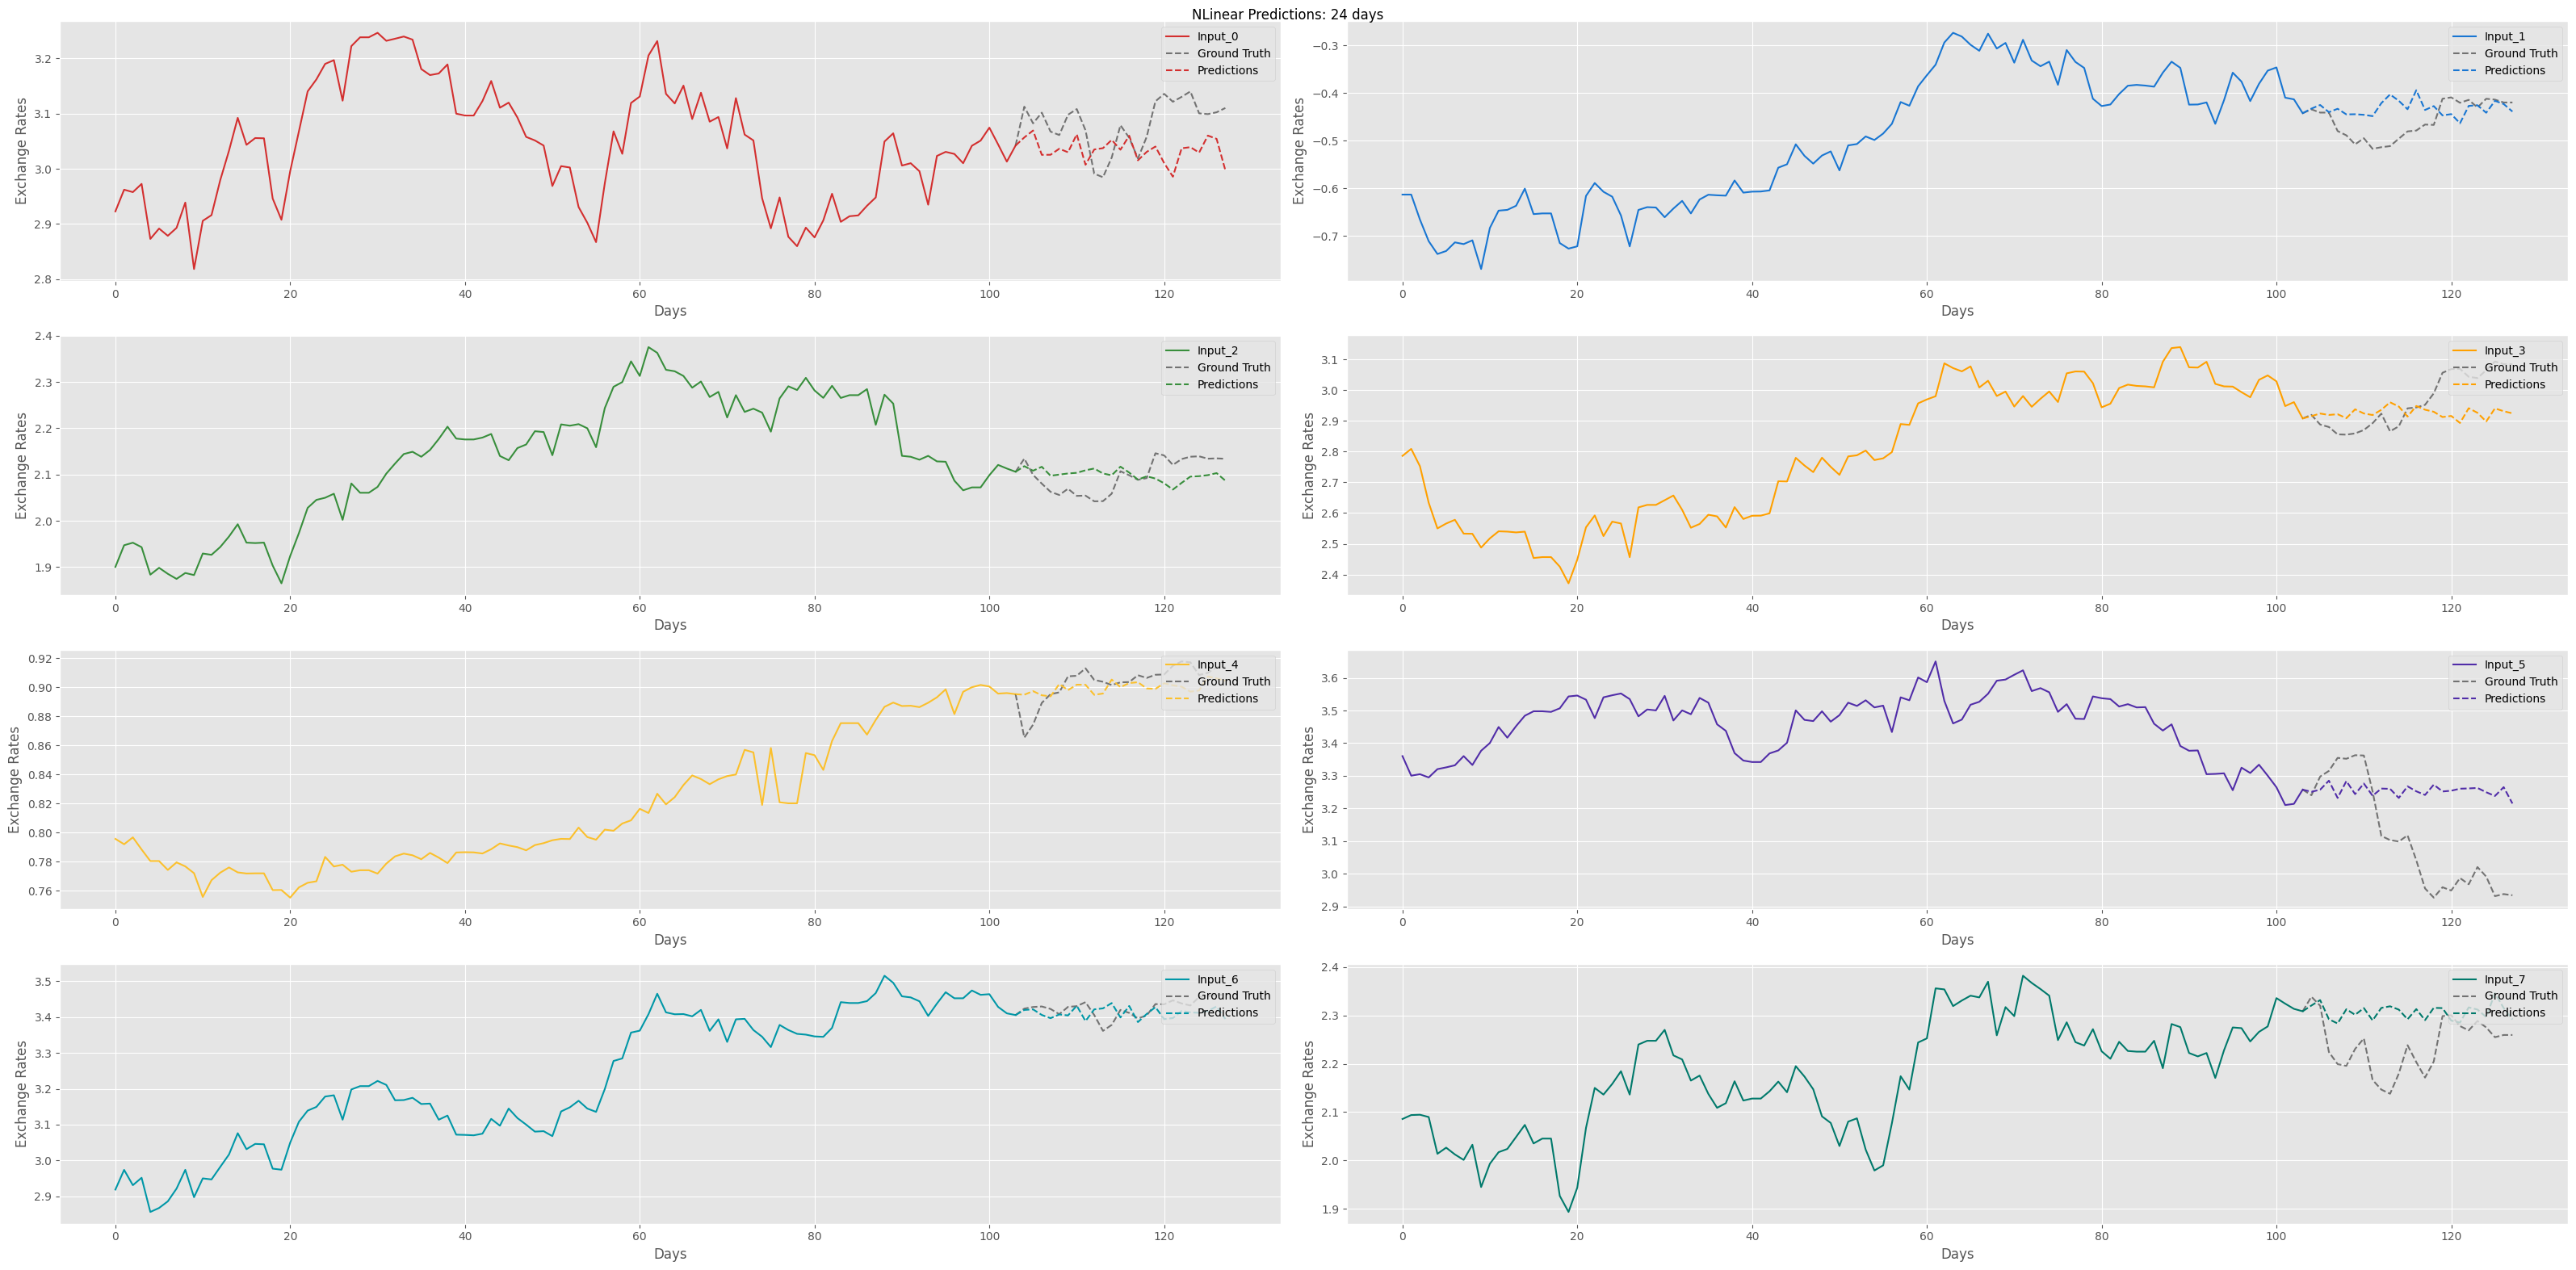

In [21]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][24])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][24])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][24])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 24 days")
plt.show()

### 36 Days

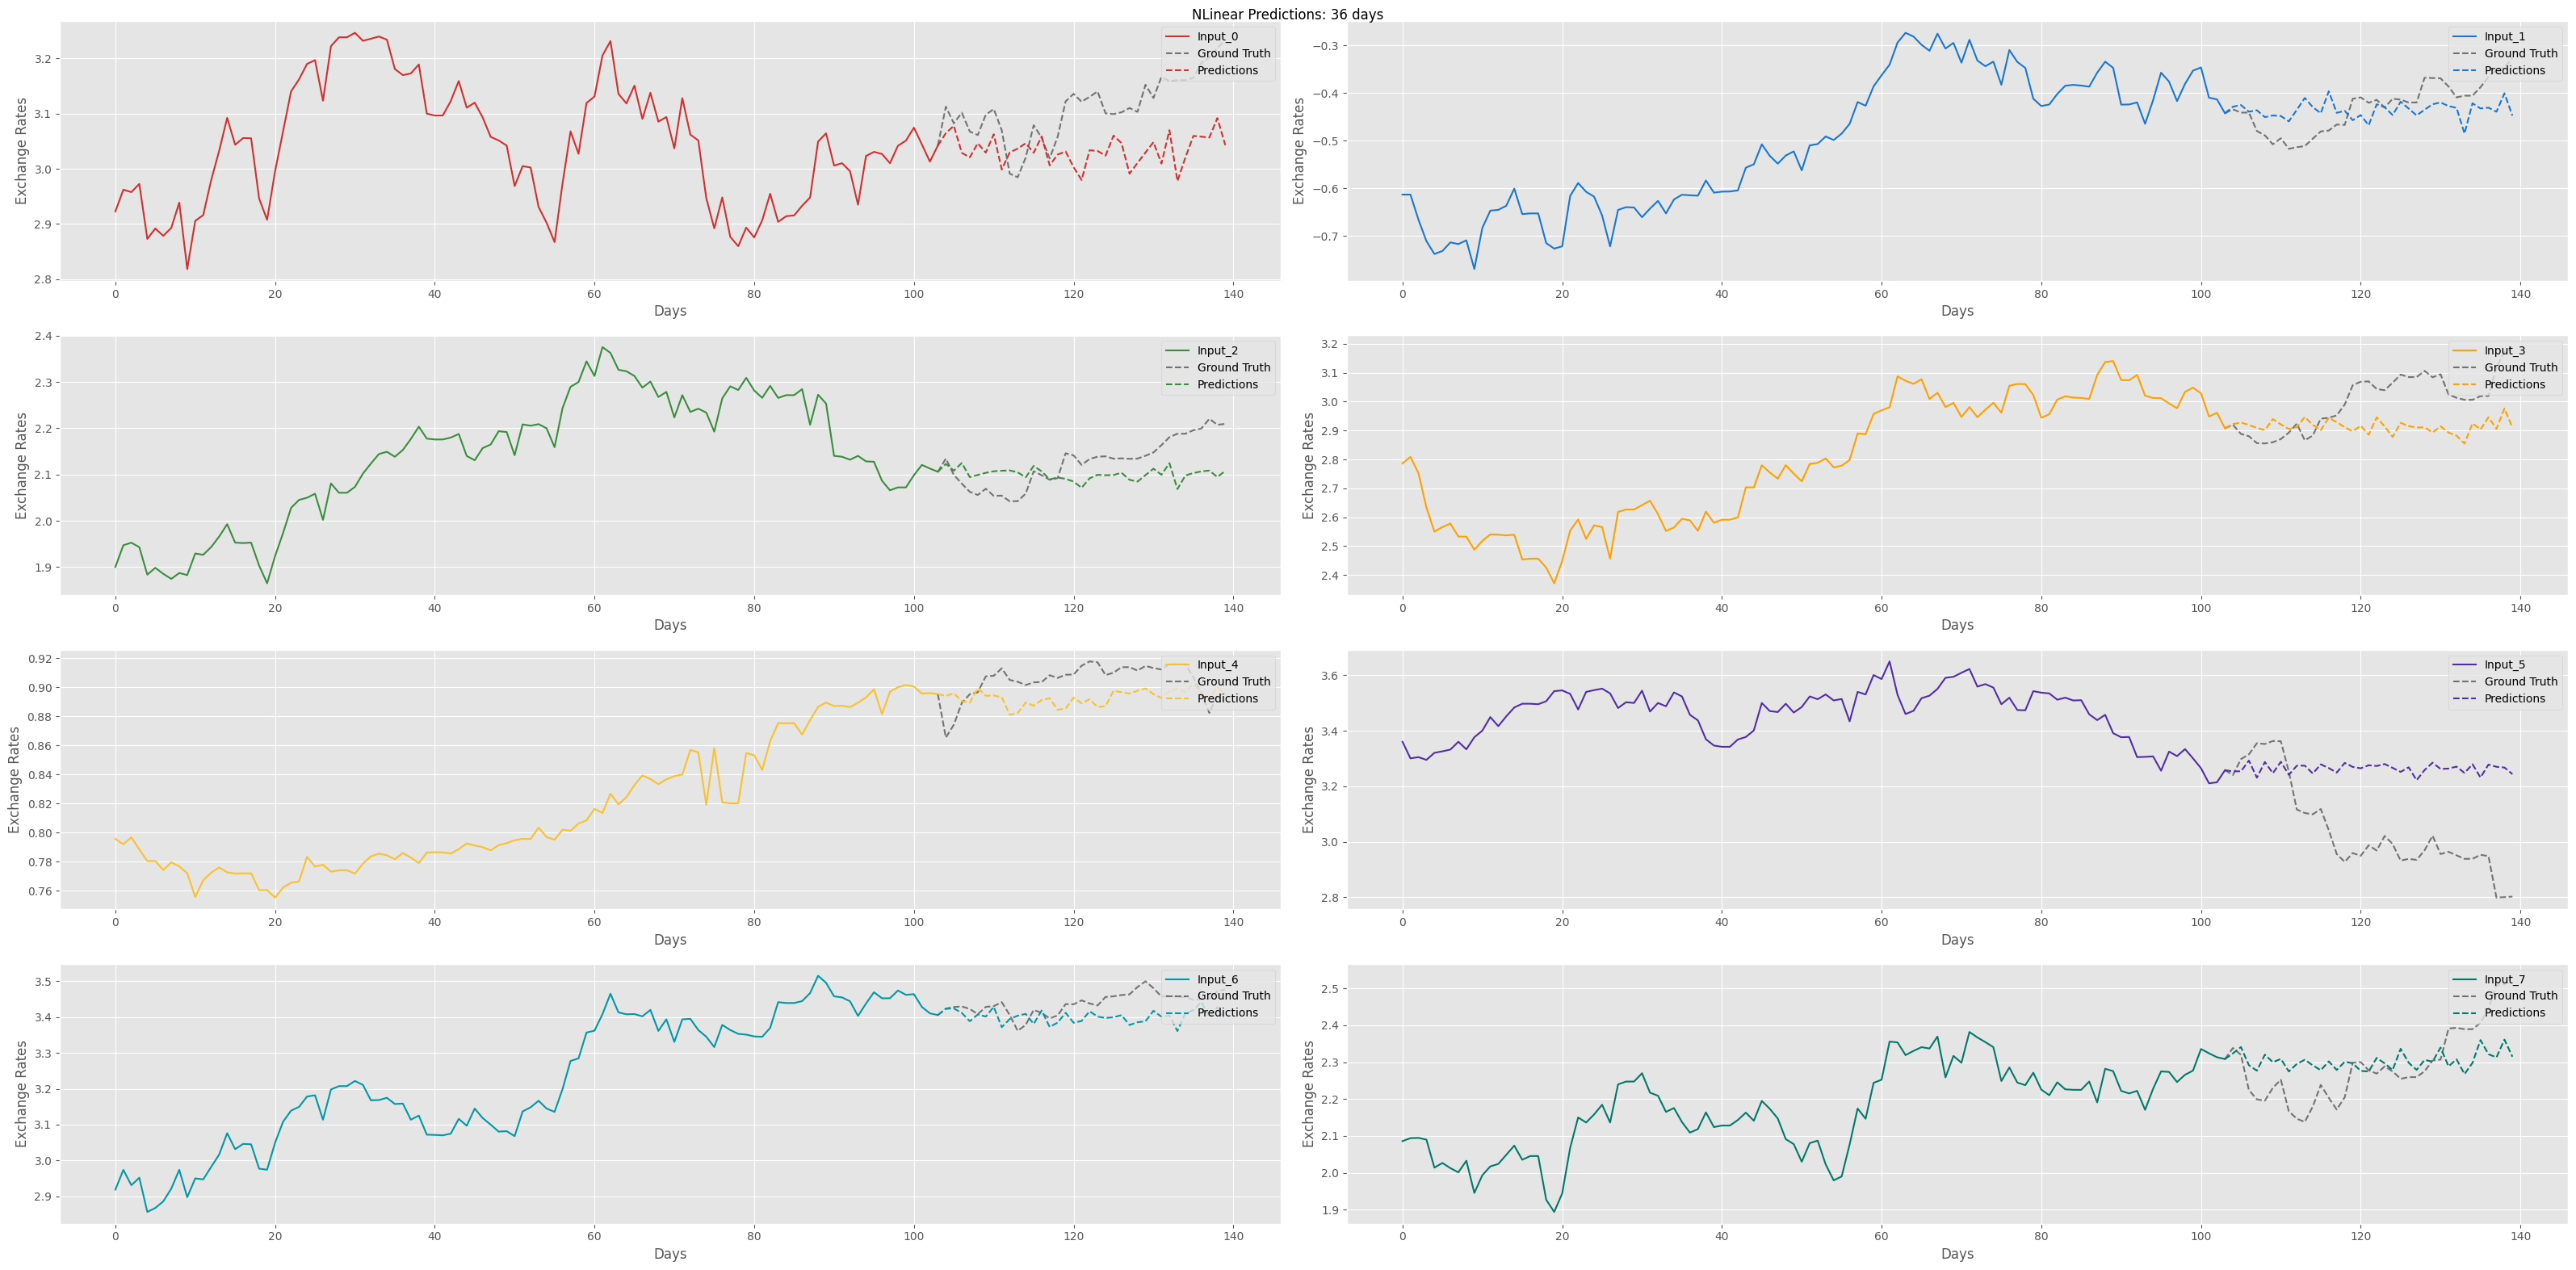

In [22]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][36])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][36])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][36])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 36 days")
plt.show()

### 48 Days

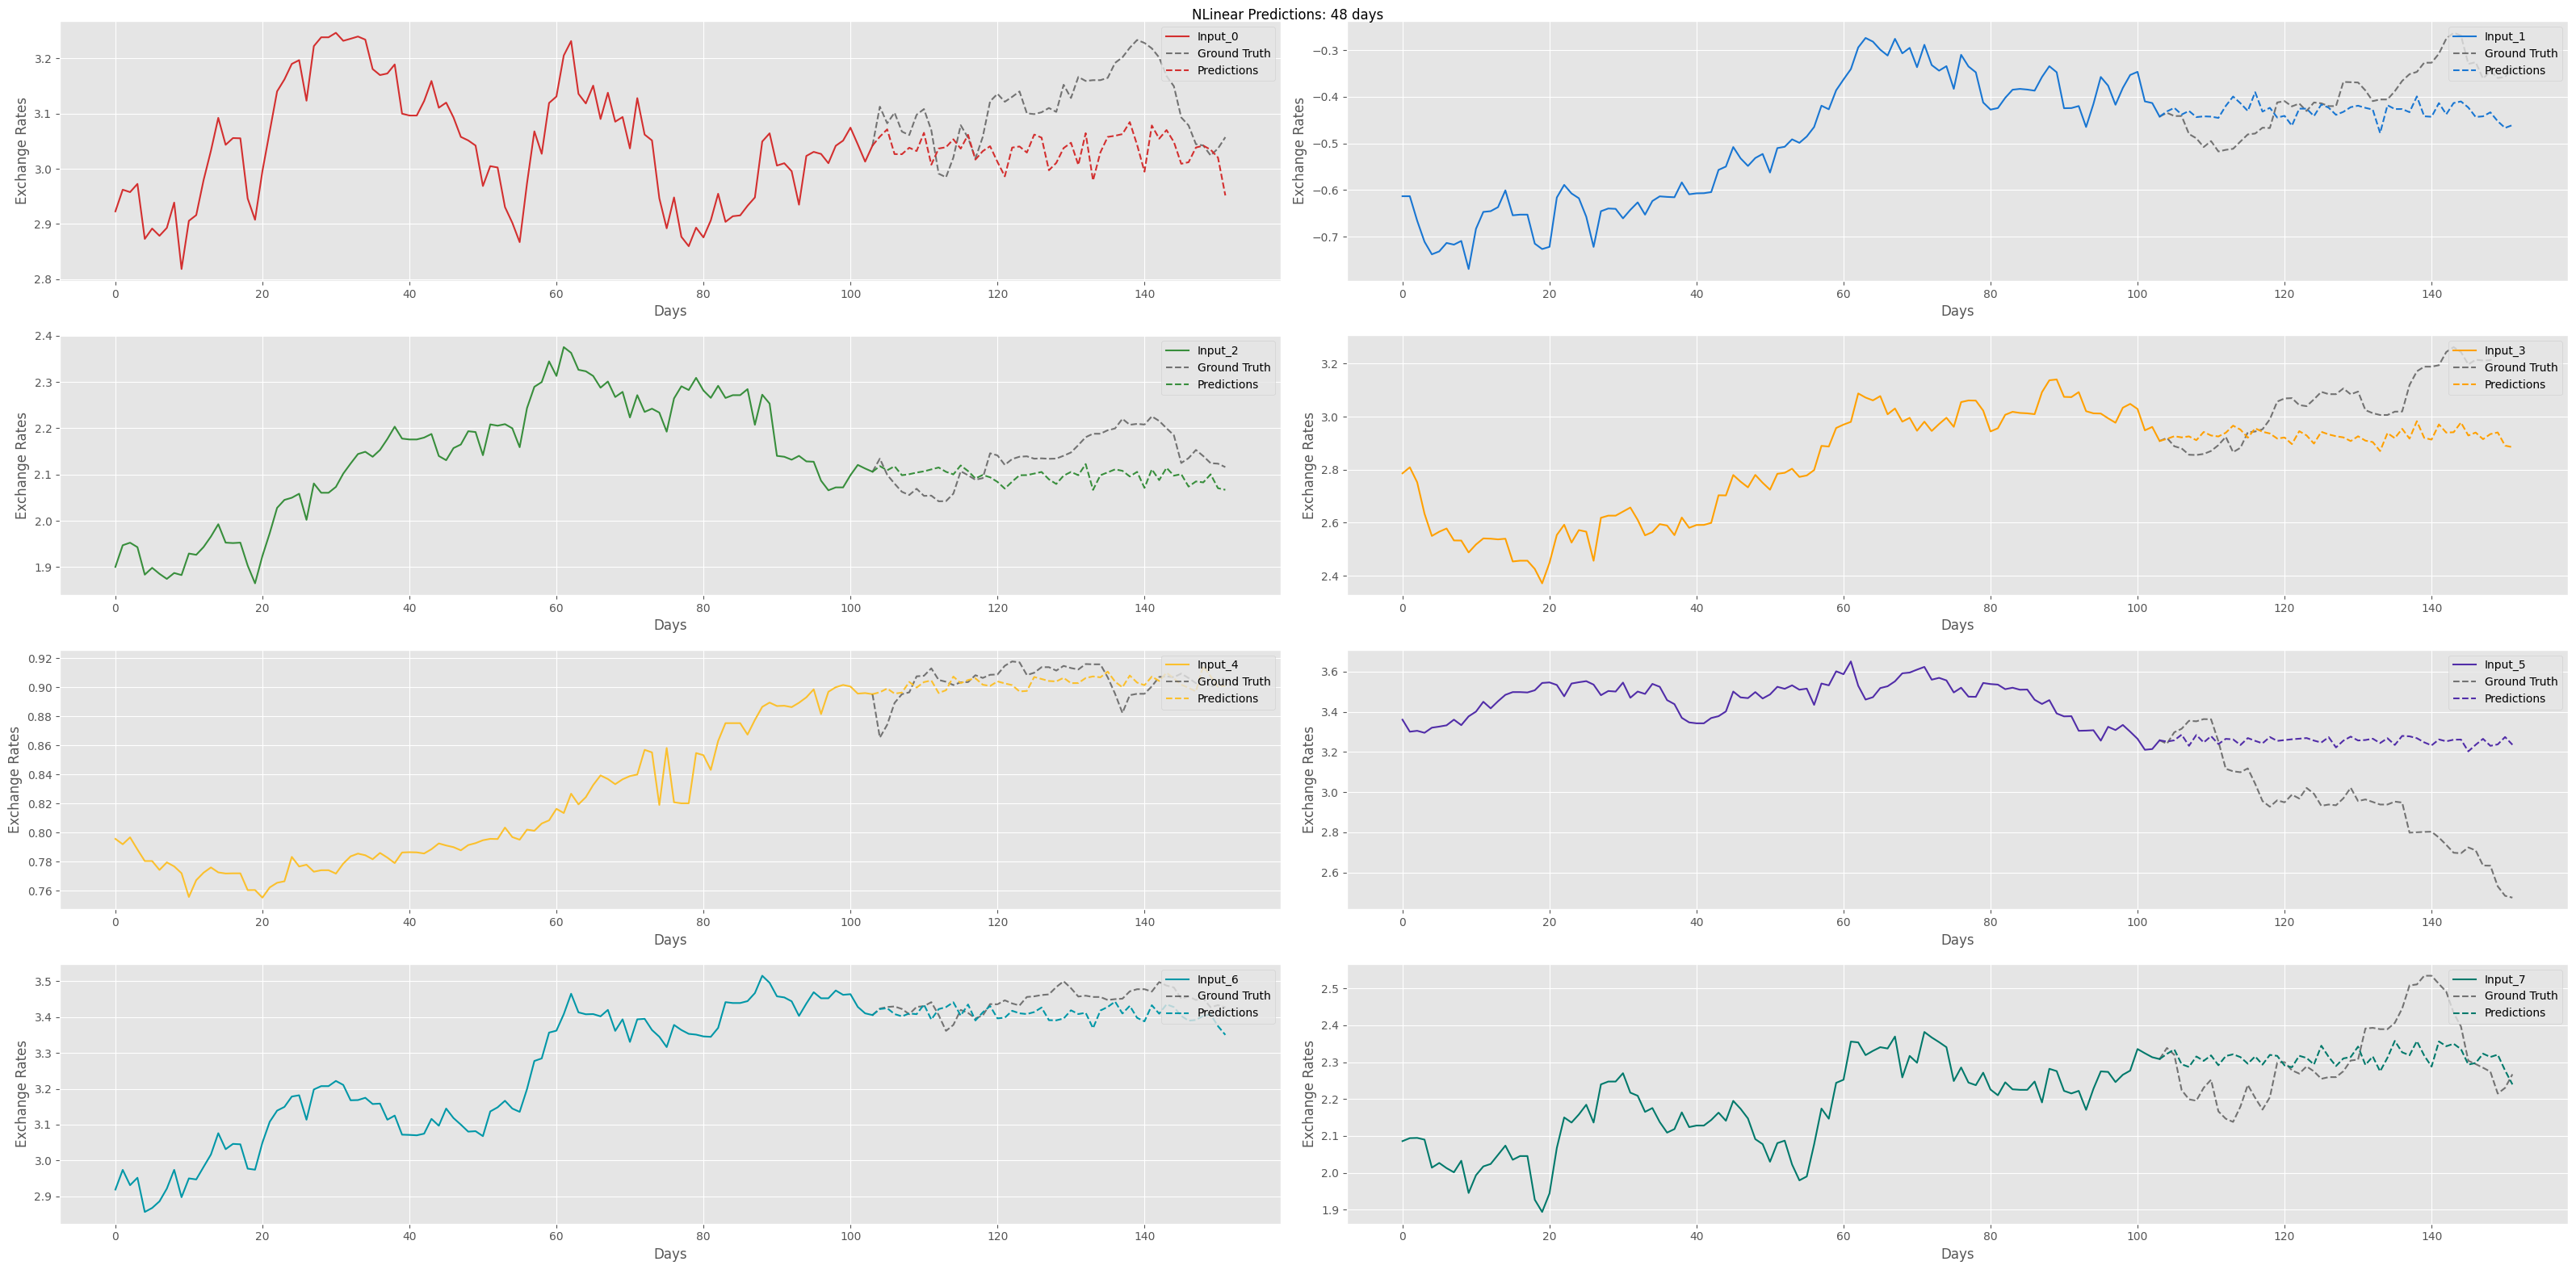

In [23]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][48])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][48])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][48])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 48 days")
plt.show()

### 60 Days

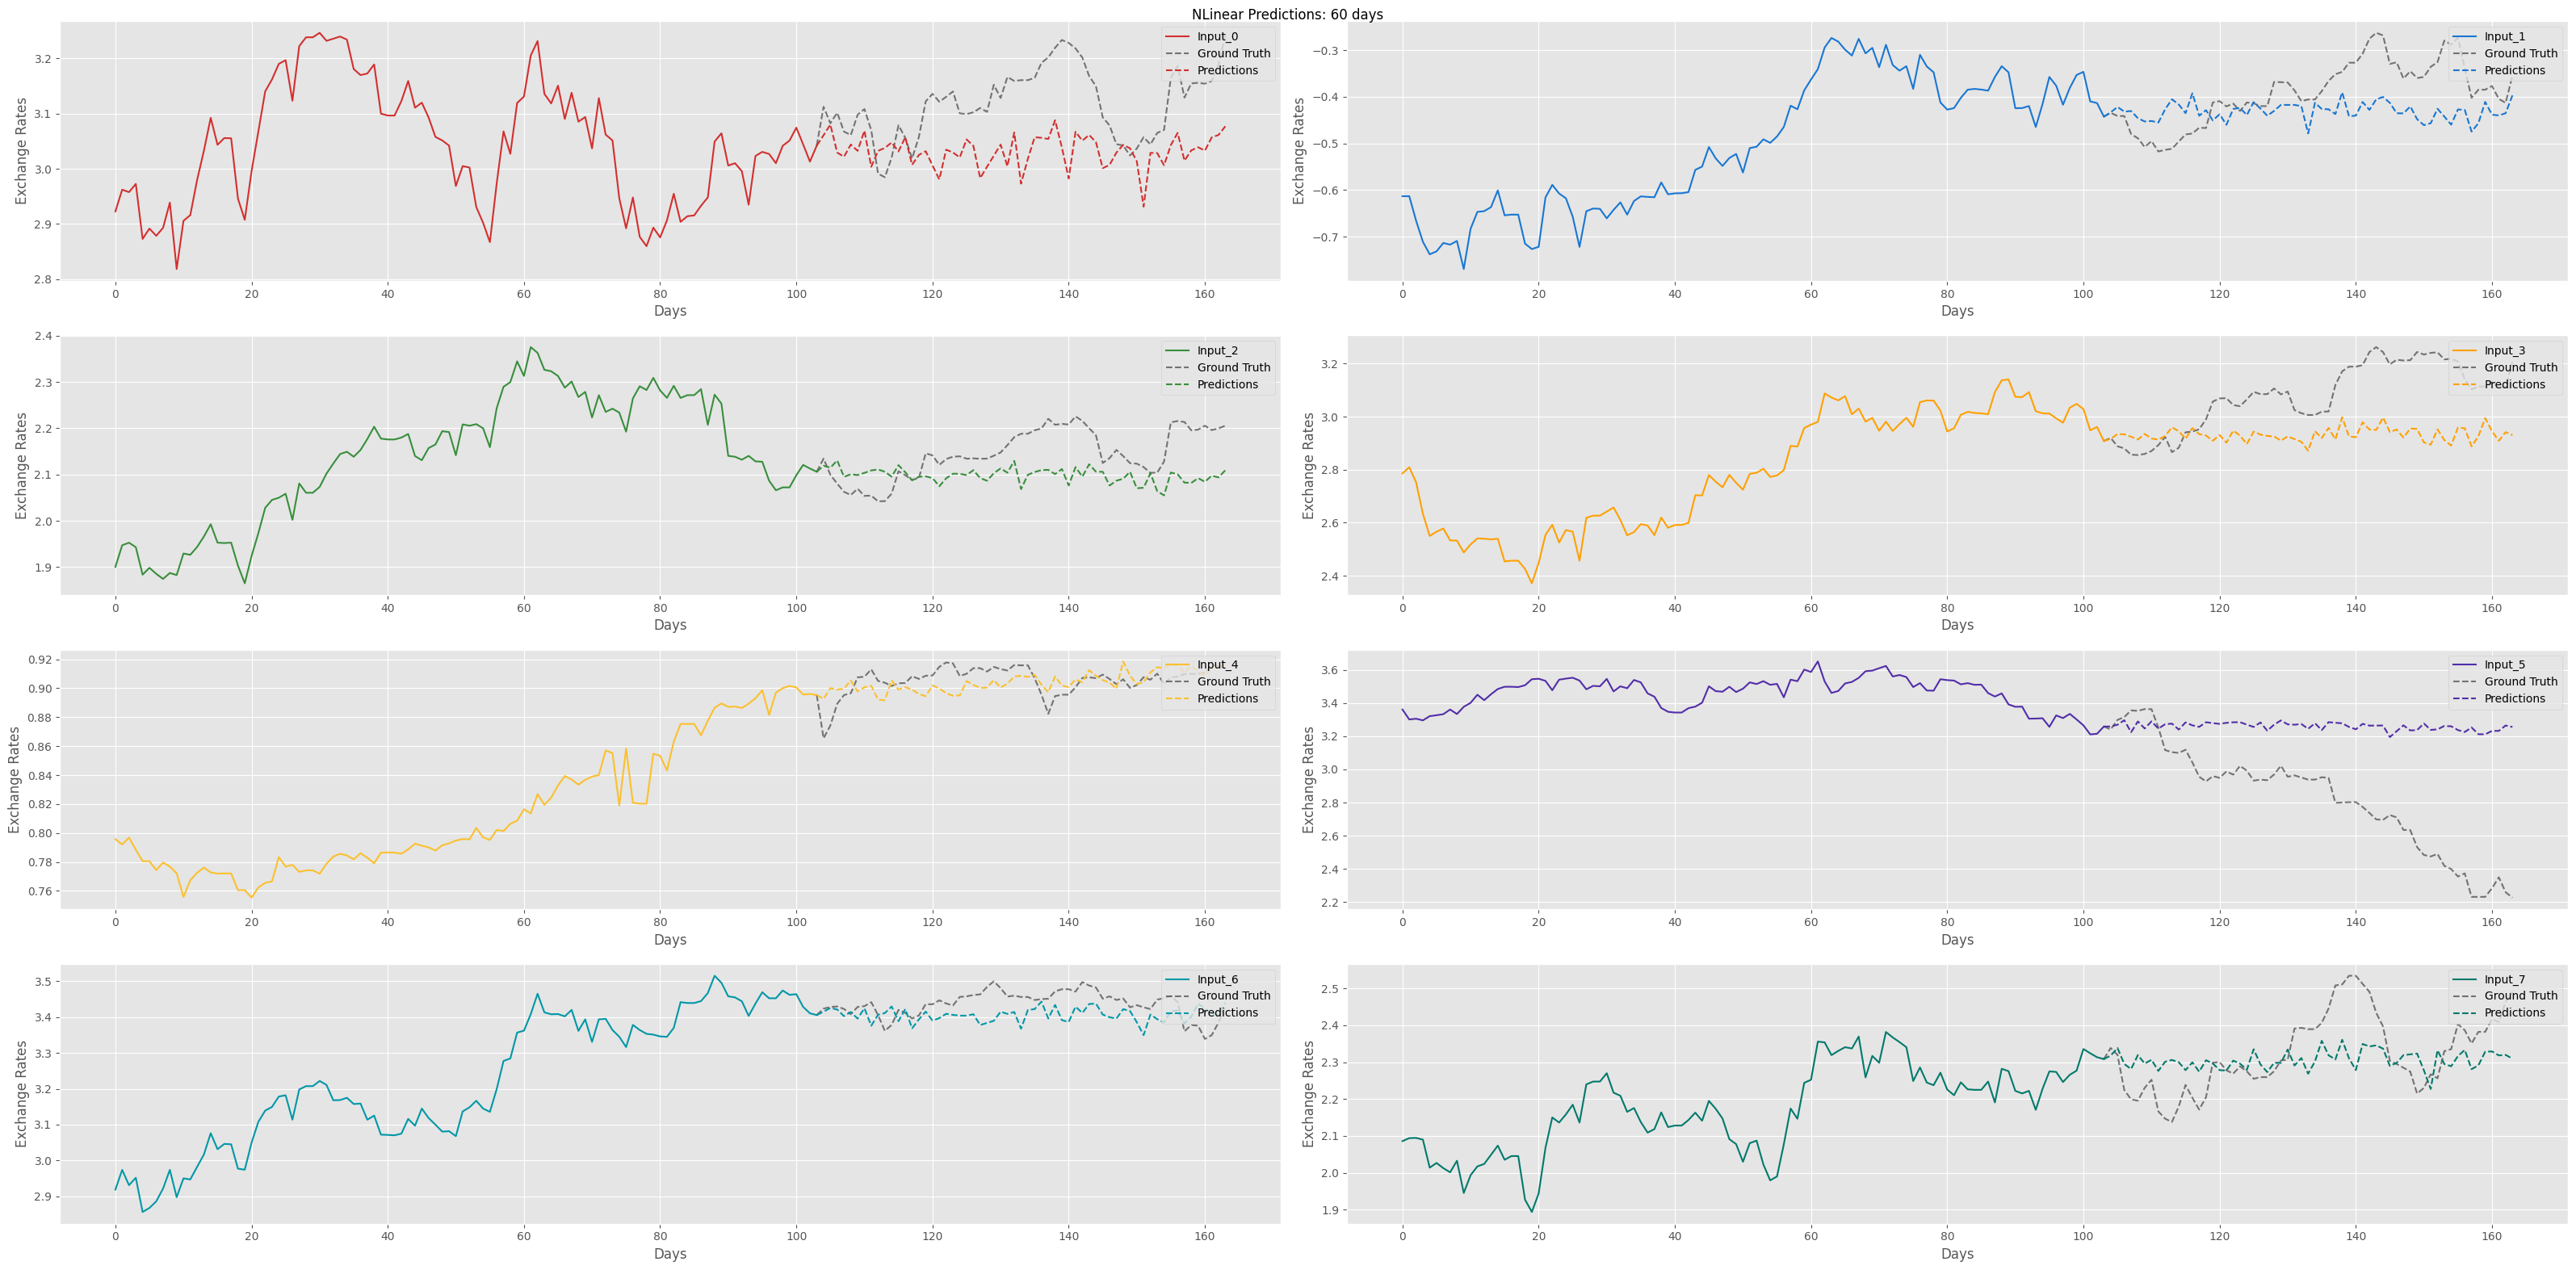

In [24]:
NLINEAR_INPUT_TIME_SERIES = torch.tensor(input_data["NLinear"][60])
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.tensor(ground_truth_data["NLinear"][60])
NLINEAR_PREDICTIONS_TIME_SERIES = torch.tensor(predictions_data["NLinear"][60])

# Add last time-step point of input onto ground truth and predictions
NLINEAR_GROUND_TRUTH_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_GROUND_TRUTH_TIME_SERIES), dim=1)
NLINEAR_PREDICTIONS_TIME_SERIES = torch.cat((NLINEAR_INPUT_TIME_SERIES[:,-1,:].unsqueeze(1), NLINEAR_PREDICTIONS_TIME_SERIES), dim=1)

fig, axs = plt.subplots(4,2, figsize=(32,16), layout="tight")
plot_indexes = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1), 4:(2,0), 5:(2,1), 6:(3,0), 7:(3,1)}

input_x_axis = np.arange(NLINEAR_INPUT_TIME_SERIES.shape[1])
# Shift ground truth and predictions data to end of input data
predictions_x_axis = np.arange(NLINEAR_GROUND_TRUTH_TIME_SERIES.shape[1]) + input_x_axis[-1]

# Plots each time series separately
for (time_series, i) in plot_indexes.items():
    # Input Plot
    axs[i].plot(NLINEAR_INPUT_TIME_SERIES[BATCH_INDEX,:,time_series], color=multi_colors[time_series], label=f"Input_{time_series}")
    # Ground Truth Plot
    axs[i].plot(predictions_x_axis, NLINEAR_GROUND_TRUTH_TIME_SERIES[BATCH_INDEX,:,time_series], "--k", alpha=0.5, label="Ground Truth")
    # Predictions
    axs[i].plot(predictions_x_axis, NLINEAR_PREDICTIONS_TIME_SERIES[BATCH_INDEX,:,time_series], linestyle="--", color=multi_colors[time_series], label="Predictions")
    
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Exchange Rates")

plt.suptitle("NLinear Predictions: 60 days")
plt.show()